EDA

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
df.head(10)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801


In [5]:
# Extract all column names from the DataFrame
column_names = df.columns

# Specify the path for the output text file
output_file = 'columns.txt'

# Write the column names to the text file
with open(output_file, 'w') as f:
    for column in column_names:
        f.write(f"{column}\n")

print(f"Column names have been written to {output_file}.")


Column names have been written to columns.txt.


In [6]:
df['Bankrupt?'] = df['Bankrupt?'].astype('category')
df[' Liability-Assets Flag'] = df[' Liability-Assets Flag'].astype('category')
df[' Net Income Flag'] = df[' Net Income Flag'].astype('category')

In [7]:
numerical_features = df.select_dtypes(include = ['number']).columns
numerical_features

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate'

In [8]:
categorical_features = df.drop(columns=['Bankrupt?']).select_dtypes(include = ['category']).columns
categorical_features

Index([' Liability-Assets Flag', ' Net Income Flag'], dtype='object')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

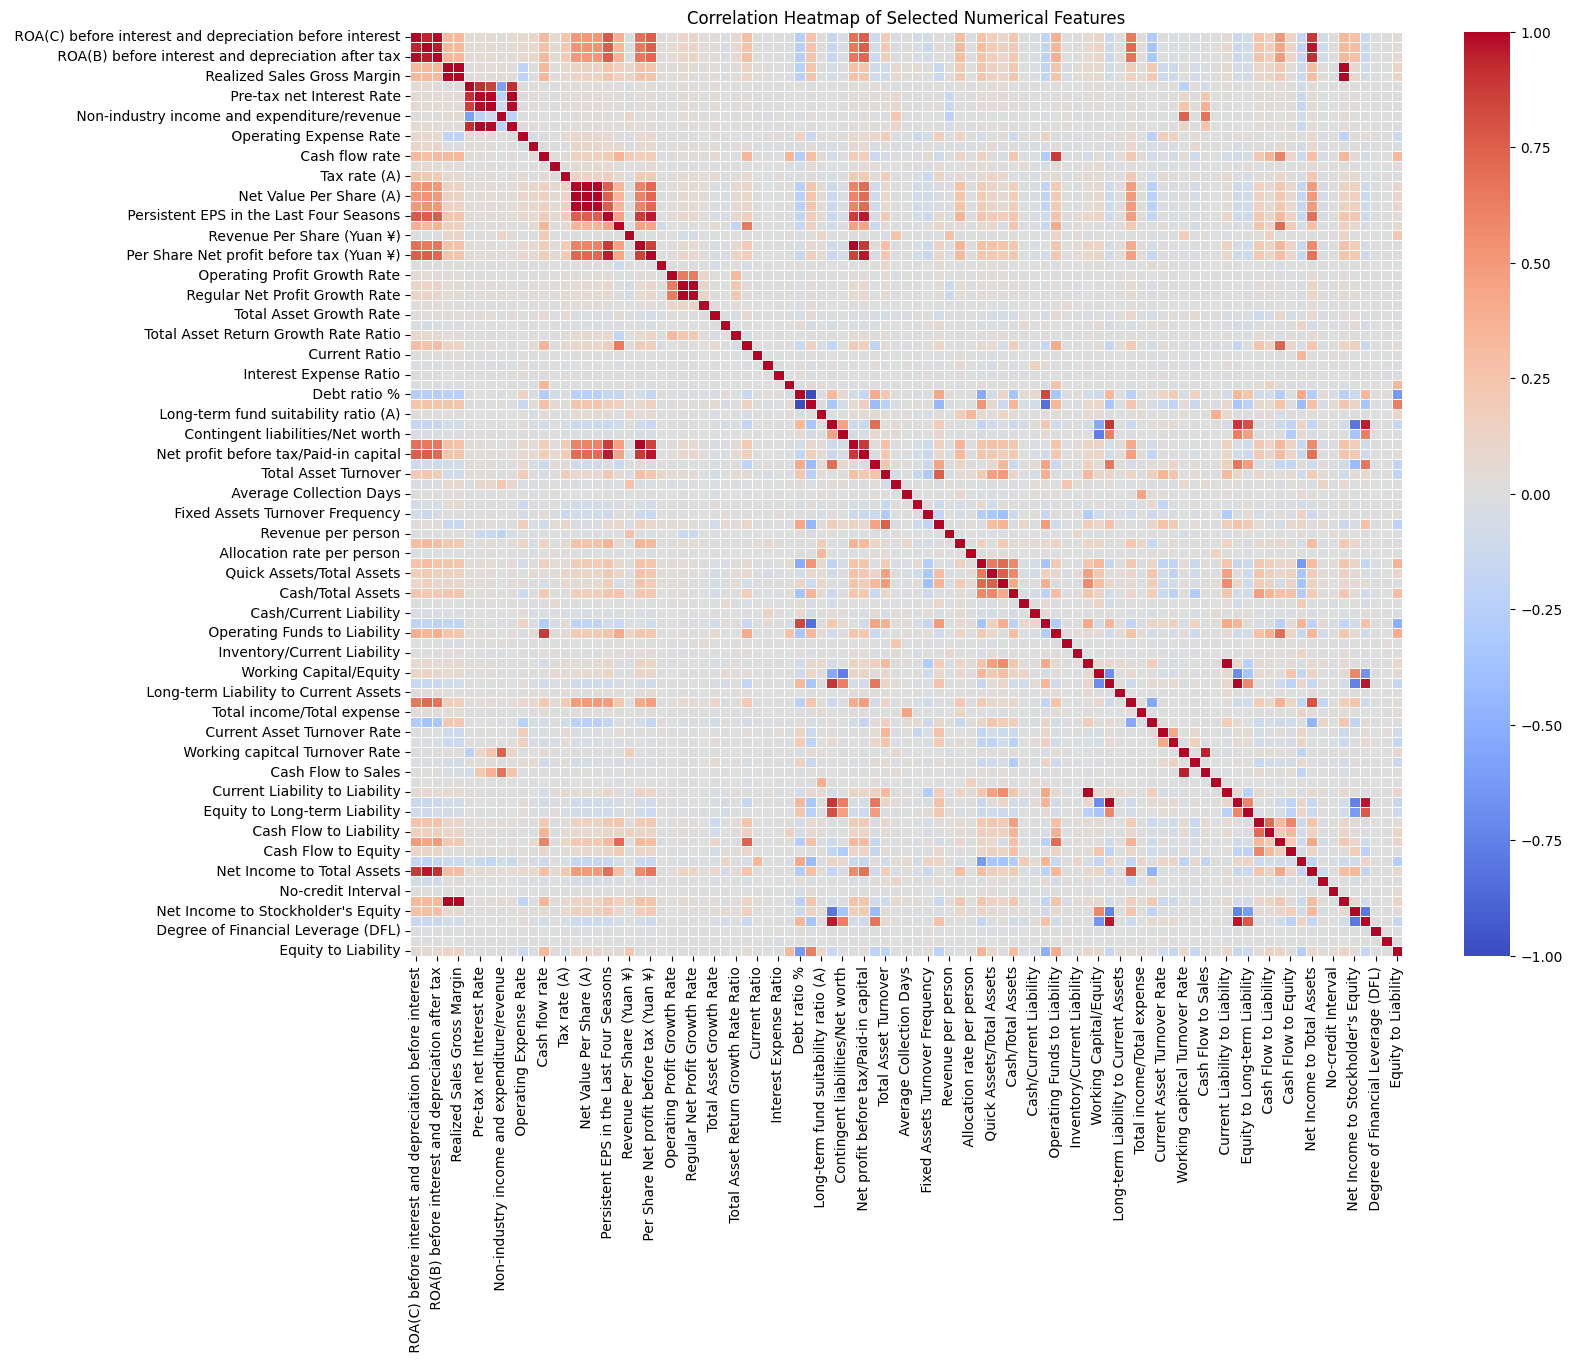

In [10]:
plt.figure(figsize=(16,12))

# Compute the correlation matrix for numerical features only
correlation_matrix_numerical = df[numerical_features].corr()

# Plot the heatmap for numerical features
sns.heatmap(correlation_matrix_numerical, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Numerical Features')
plt.show()

In [11]:
correlation_matrix = df[numerical_features].corr().abs()

high_correlation_drop = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        # remove highly related columns i.e, > 0.60
        if correlation_matrix.iloc[i, j] > 0.70:
            feature_name = correlation_matrix.columns[i]
            if feature_name not in high_correlation_drop:
                high_correlation_drop.append(feature_name)

numerical_features_reduced = [feature for feature in numerical_features if feature not in high_correlation_drop]

numerical_features_reduced

[' ROA(C) before interest and depreciation before interest',
 ' Operating Gross Margin',
 ' Operating Profit Rate',
 ' Non-industry income and expenditure/revenue',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Continuous Net Profit Growth Rate',
 ' Total Asset Growth Rate',
 ' Net Value Growth Rate',
 ' Total Asset Return Growth Rate Ratio',
 ' Cash Reinvestment %',
 ' Current Ratio',
 ' Quick Ratio',
 ' Interest Expense Ratio',
 ' Total debt/Total net worth',
 ' Debt ratio %',
 ' Long-term fund suitability ratio (A)',
 ' Borrowing dependency',
 ' Contingent liabilities/Net worth',
 ' Total Asset Turnover',
 ' Accounts Receivable Turnover',
 ' Average Collection Days',
 ' Inventor

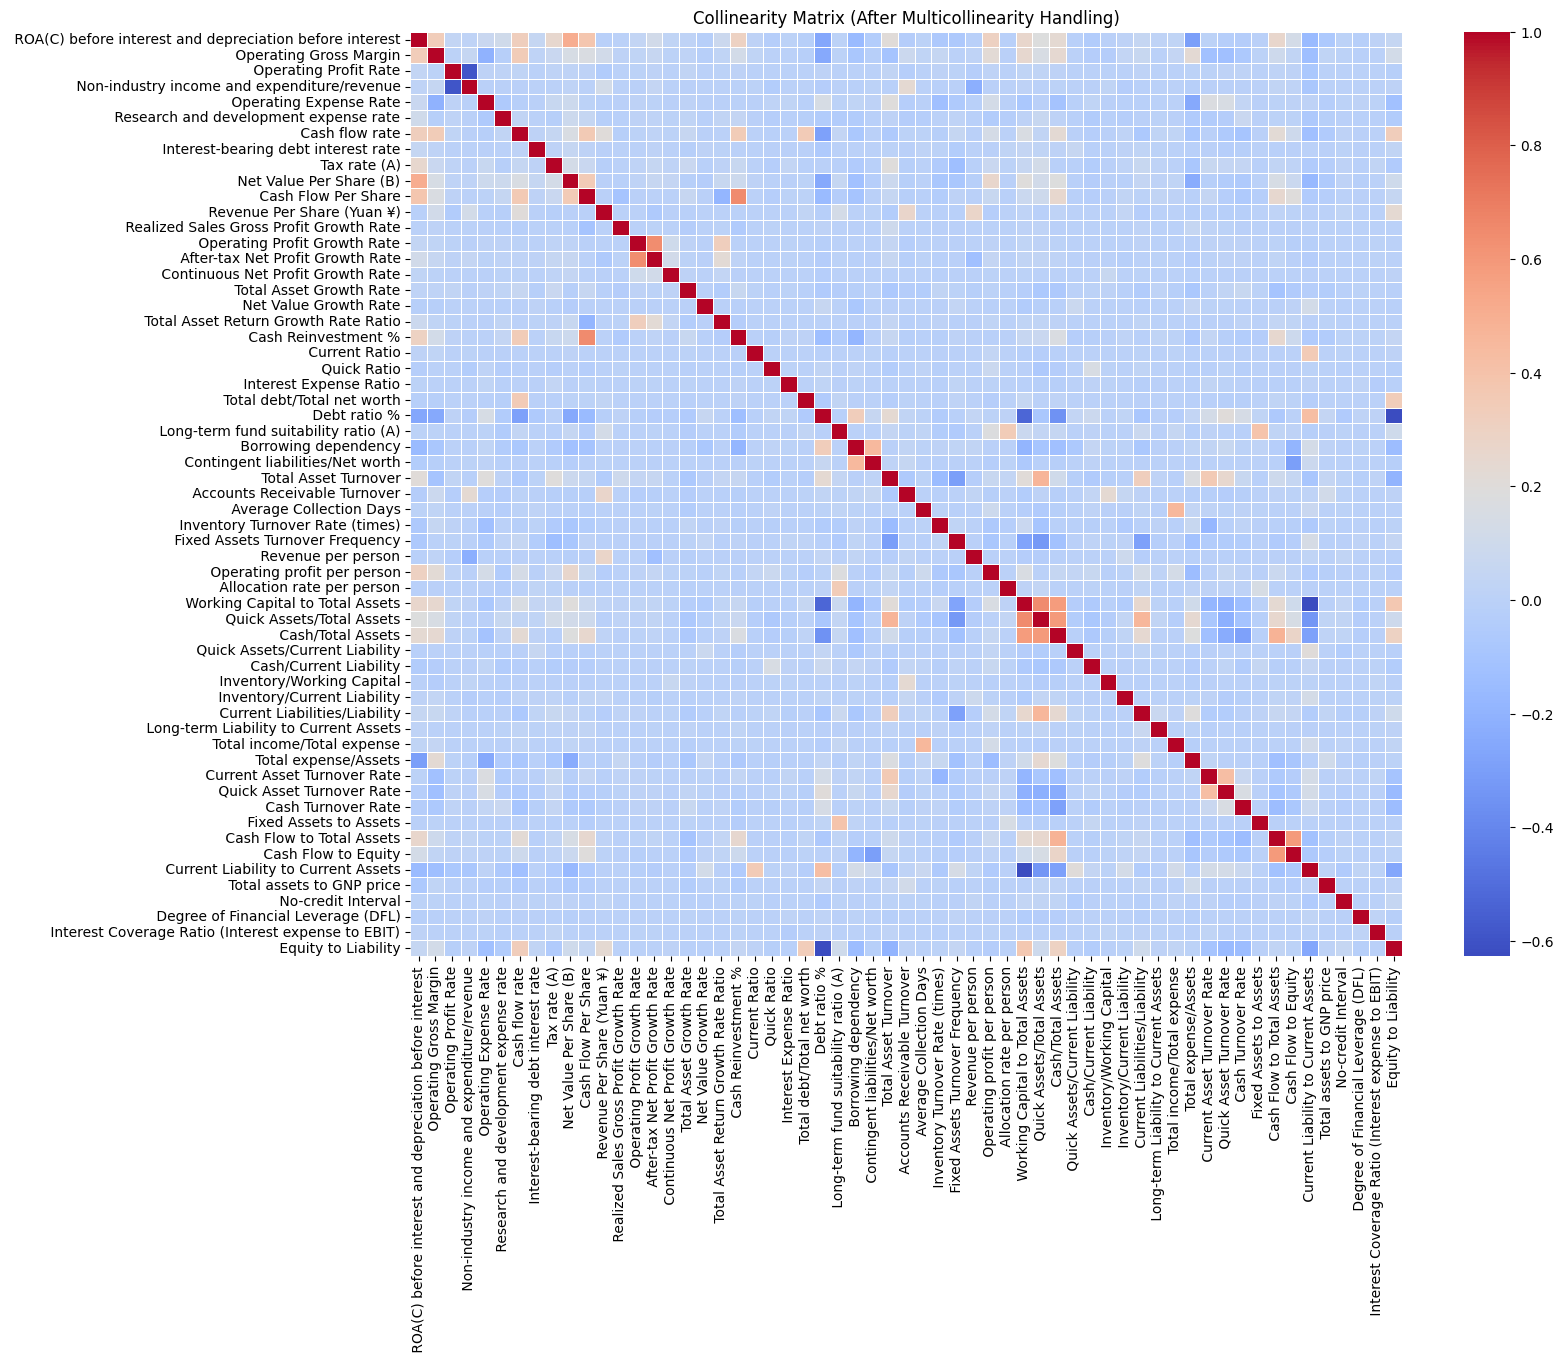

In [12]:
# Compute the correlation matrix for the reduced set of features (after handling multicollinearity)
collinearity_matrix = df[numerical_features_reduced].corr()

# Set figure size for better visibility
plt.figure(figsize=(16,12))

# Plot the collinearity matrix as a heatmap
sns.heatmap(collinearity_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Collinearity Matrix (After Multicollinearity Handling)')
plt.show()


In [13]:
print(len(numerical_features_reduced))

59


In [14]:
def plot_outlier_histogram(dataframe):
    outlier_percentage = {}

    for feature in dataframe.select_dtypes(include=[np.number]).columns:
        Q1 = dataframe[feature].quantile(0.25)
        Q3 = dataframe[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = dataframe[(dataframe[feature] < lower_bound) | (dataframe[feature] > upper_bound)]
        outlier_percentage[feature] = (len(outliers) / len(dataframe)) * 100

    plt.figure(figsize=(10, 6))
    plt.bar(outlier_percentage.keys(), outlier_percentage.values(), color='skyblue')
    plt.xlabel('Features')
    plt.ylabel('Outlier Percentage (%)')
    plt.title('Outlier Percentage in Numerical Features')
    plt.xticks(rotation=90)
    plt.show()

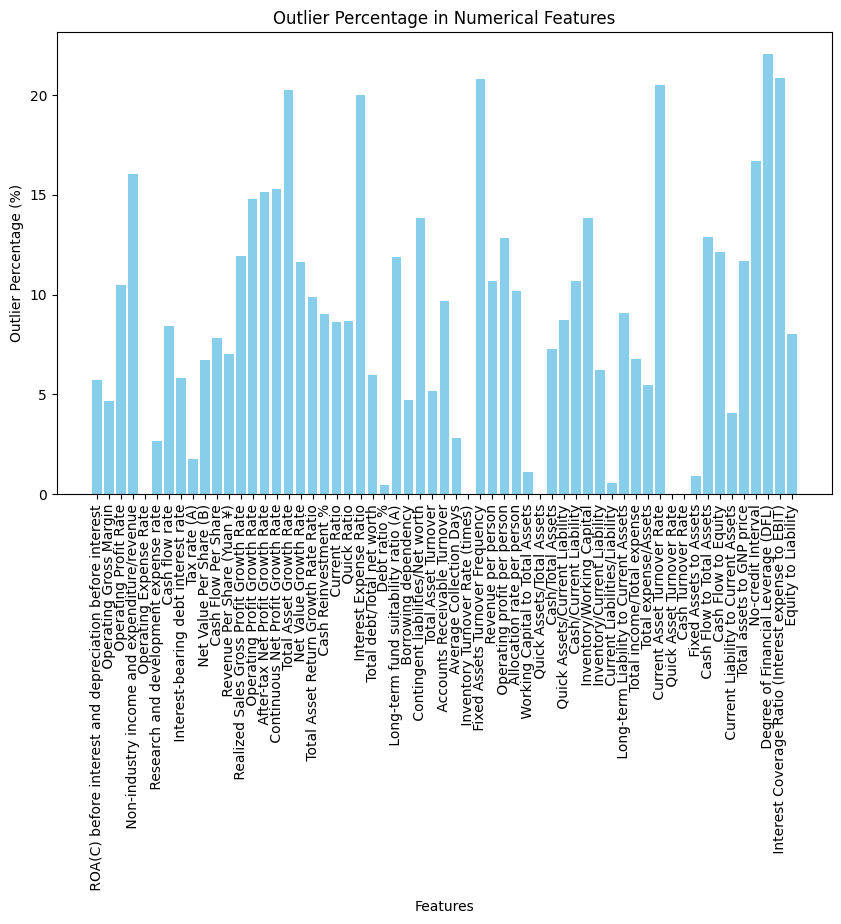

In [15]:
plot_outlier_histogram(df[numerical_features_reduced])

In [16]:
def outliers_filter(df, threshold):
    outliers_filtred = []

    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        # outliers_count[column] = 100 * outliers.shape[0] / df[column].shape[0]
        if (100 * outliers.shape[0] / df[column].shape[0]) <= threshold:
            outliers_filtred = outliers_filtred + [column]
    return outliers_filtred

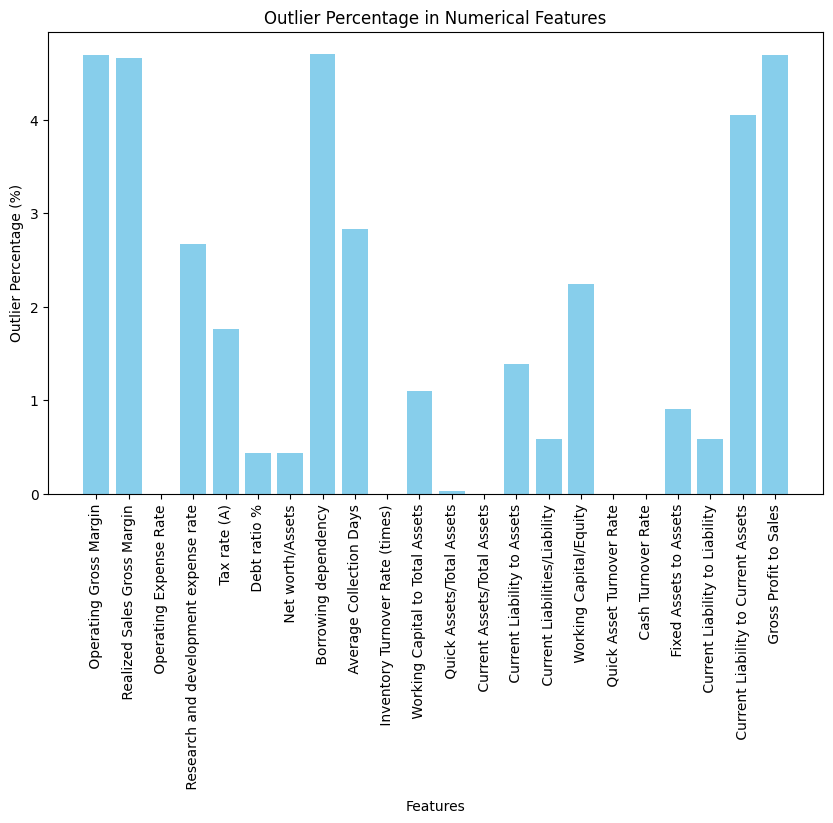

In [17]:
numerical_features_filtered = outliers_filter(df, 5)
plot_outlier_histogram(df[numerical_features_filtered])


In [18]:
def replace_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), df[column].median(), df[column])
    return df

In [19]:
df = replace_outliers_iqr(df, numerical_features_filtered)

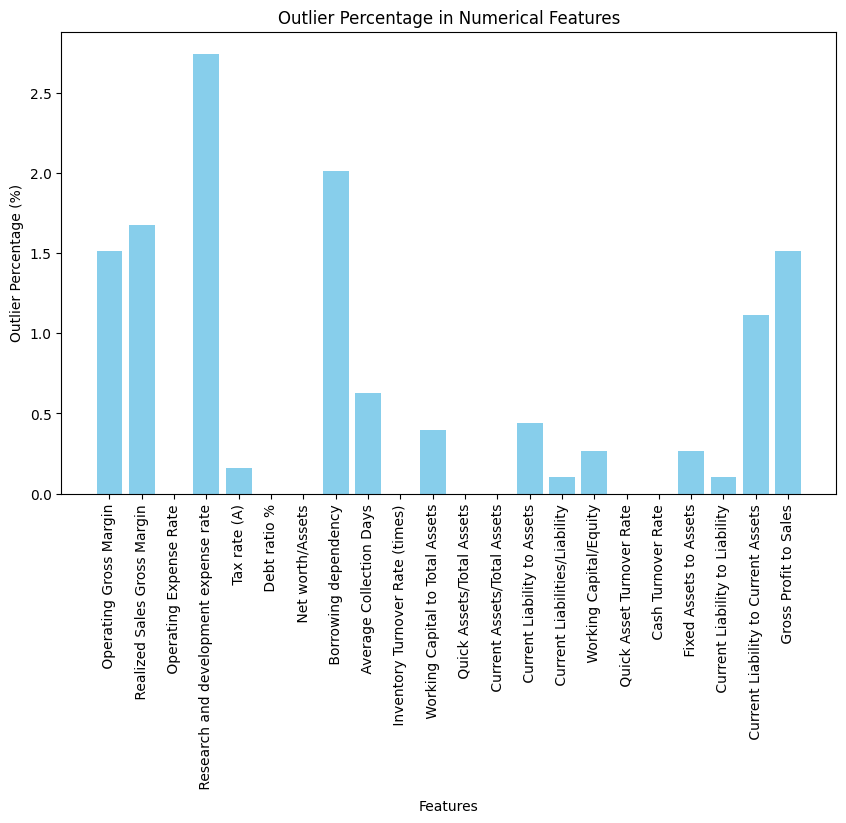

In [20]:
plot_outlier_histogram(df[numerical_features_filtered])

In [21]:
import seaborn as sns

def plot_boxplots(dataframe, target_column, features):
    palette = sns.color_palette('husl', len(dataframe[target_column].unique()))

    for feature in features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)
        plt.title(f'Boxplot of {feature} by Target Variable')
        plt.show()


C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


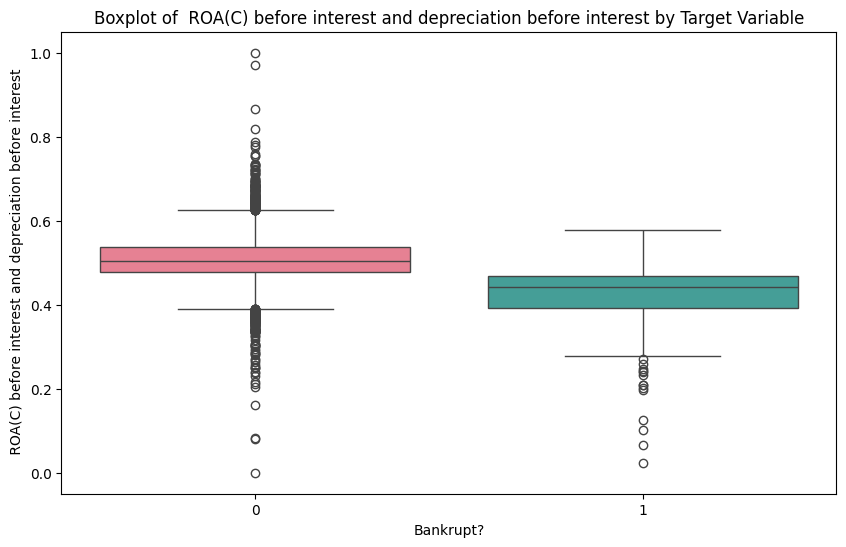

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


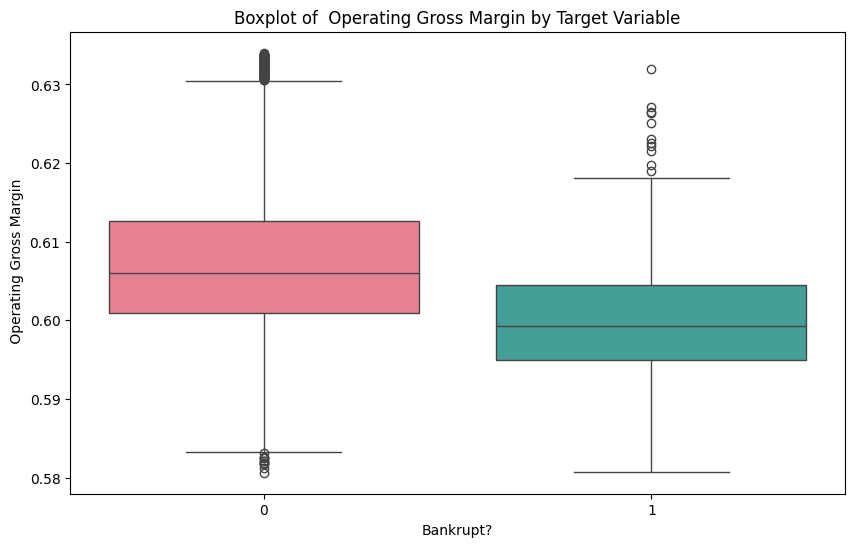

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


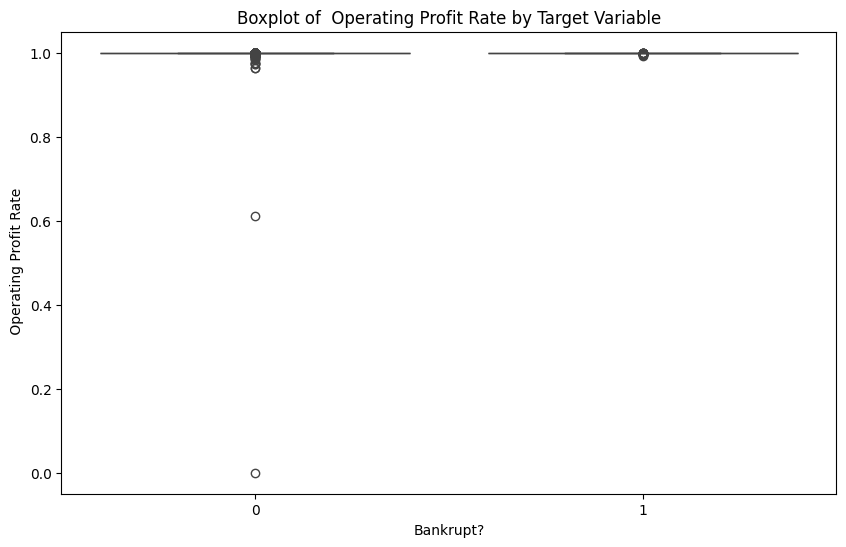

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


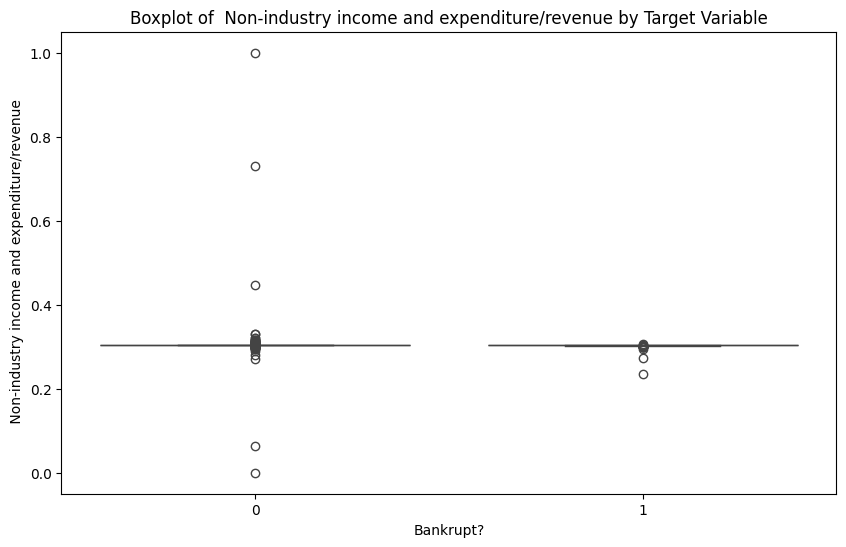

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


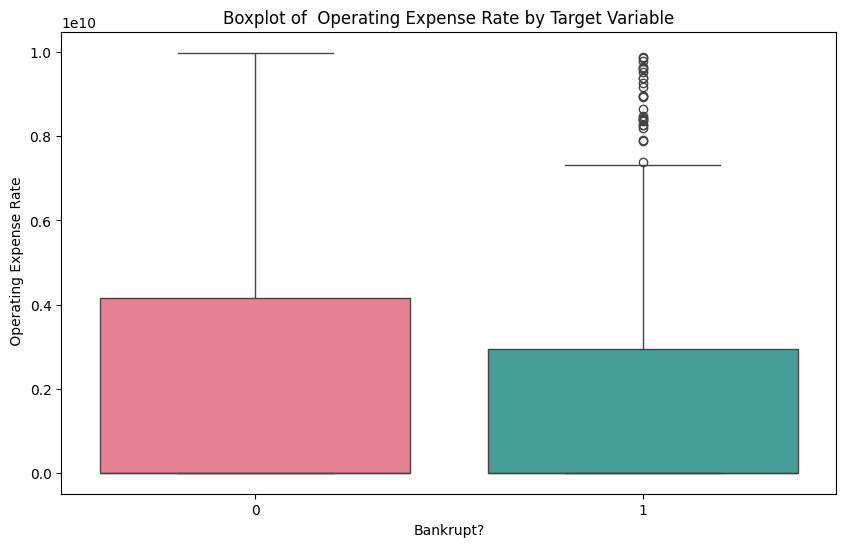

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


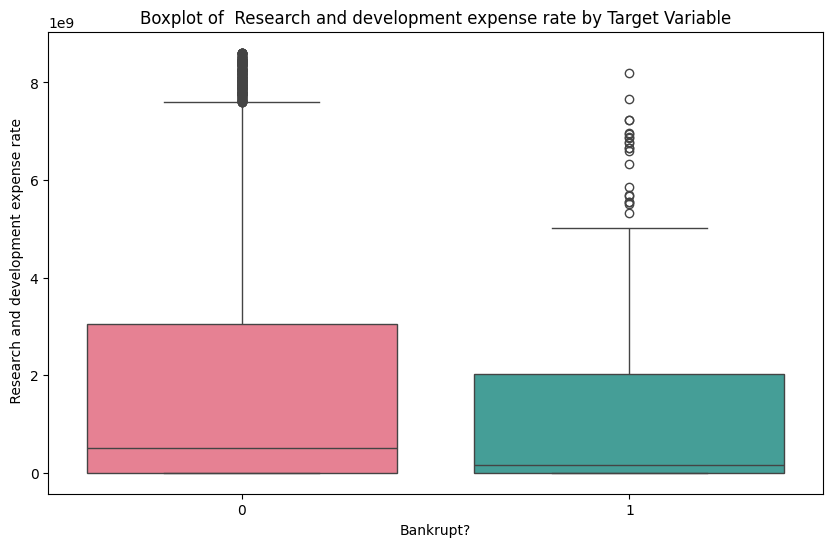

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


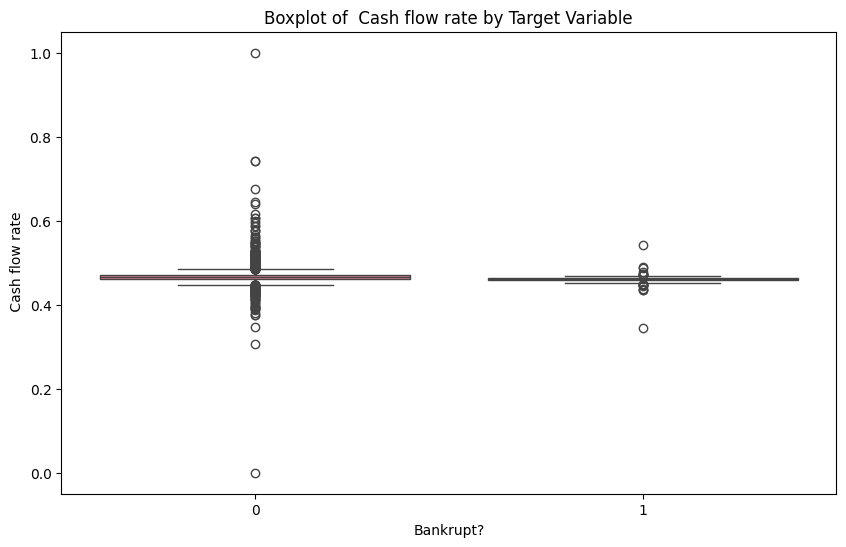

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


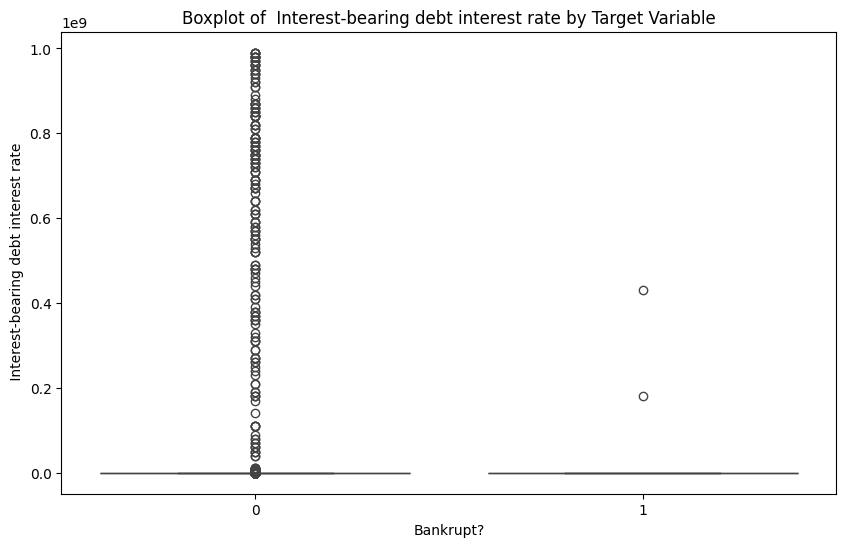

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


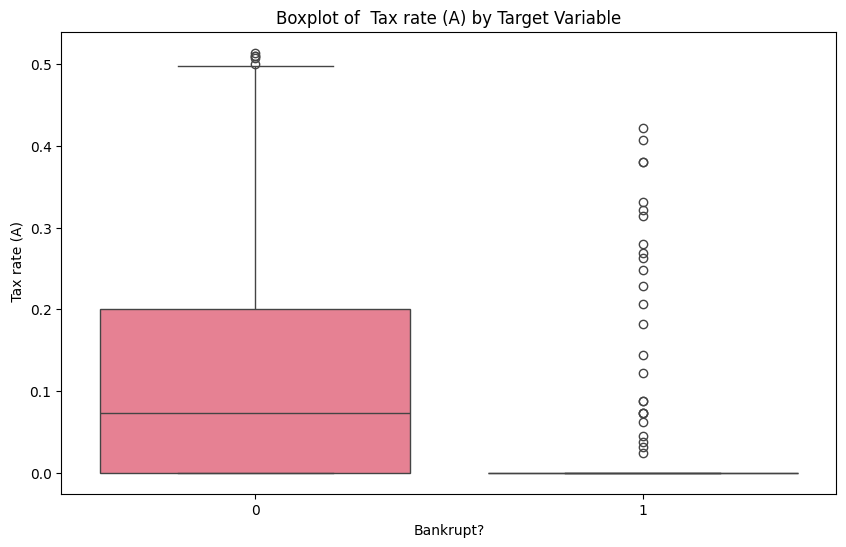

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


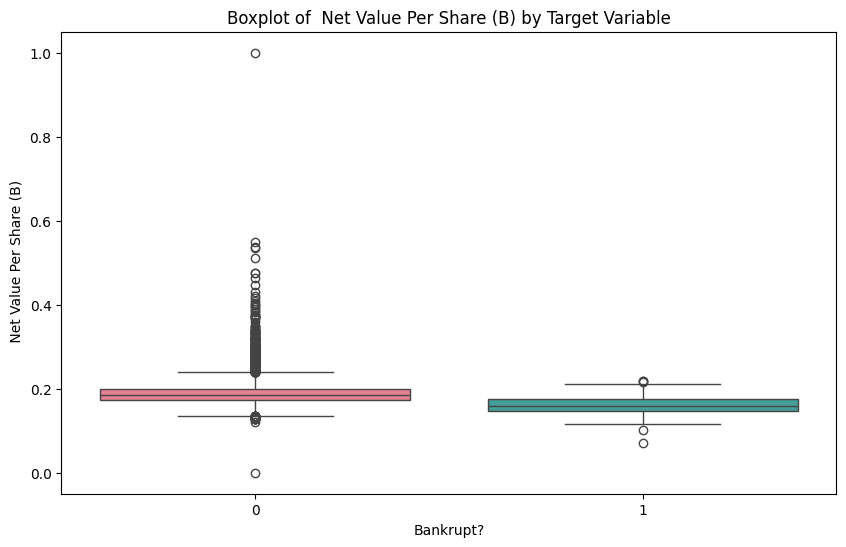

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


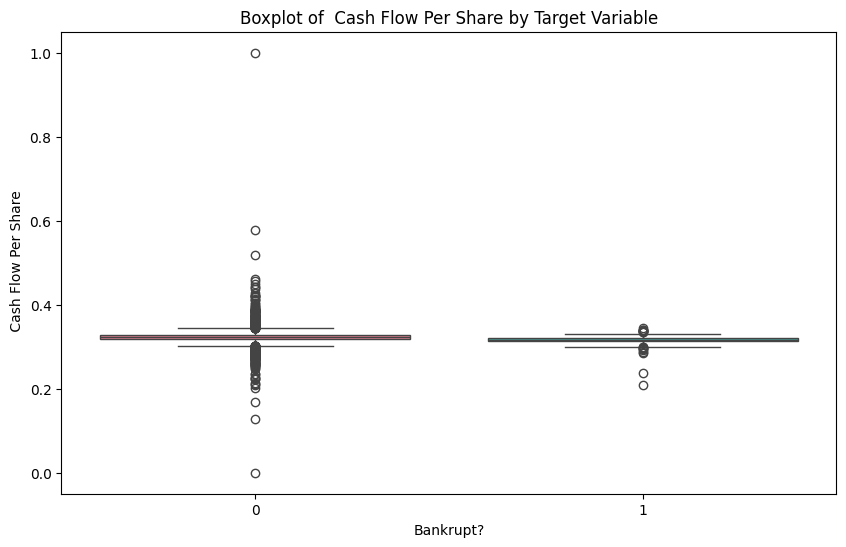

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


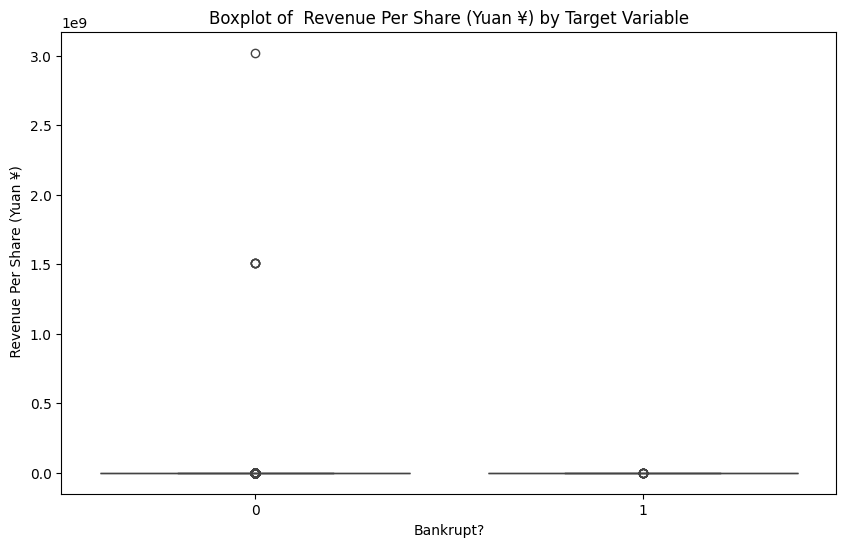

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


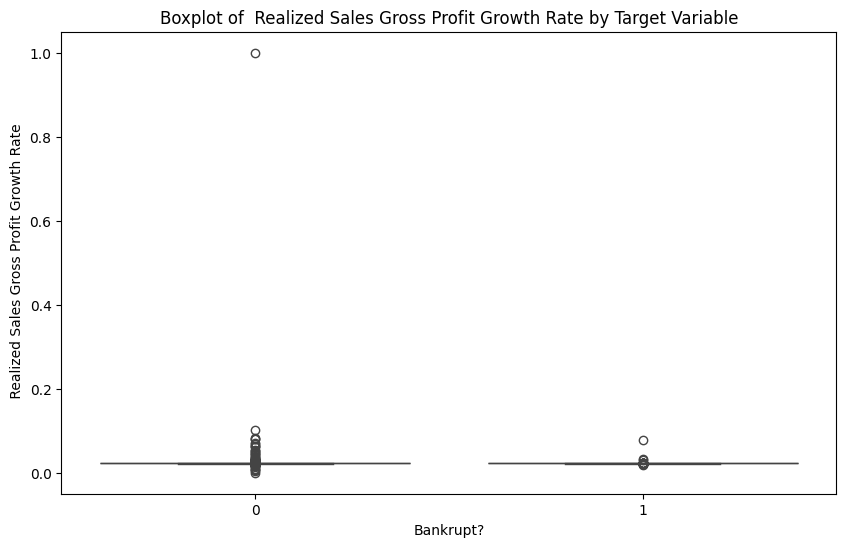

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


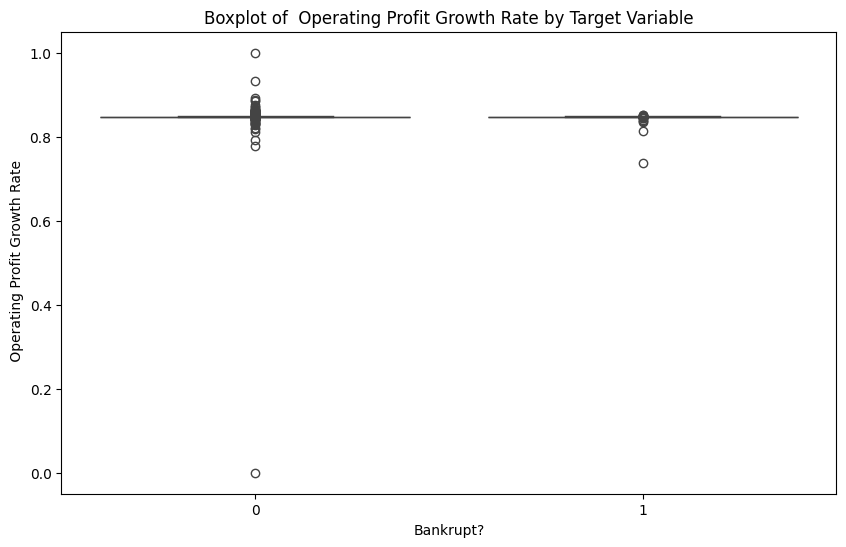

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


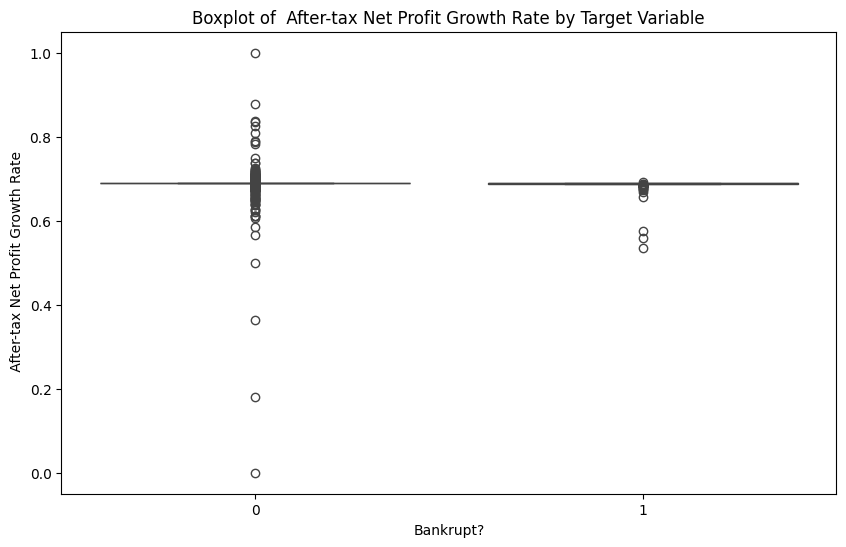

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


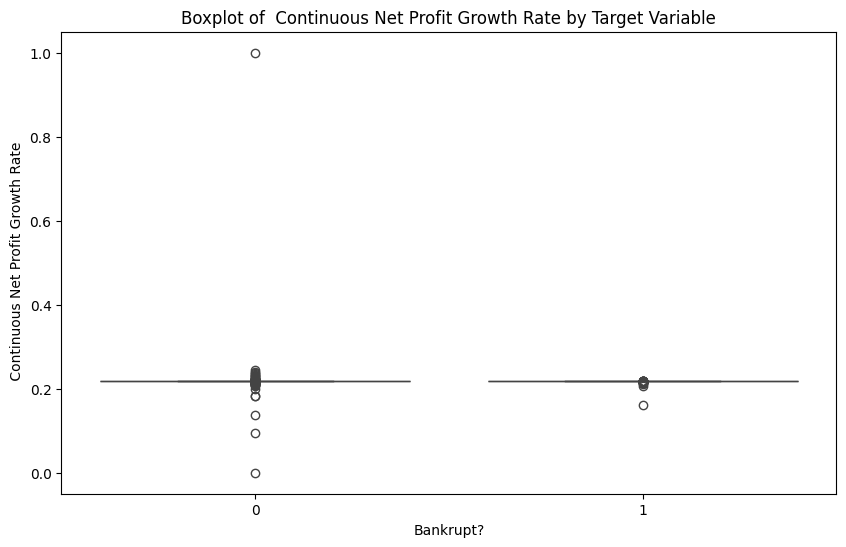

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


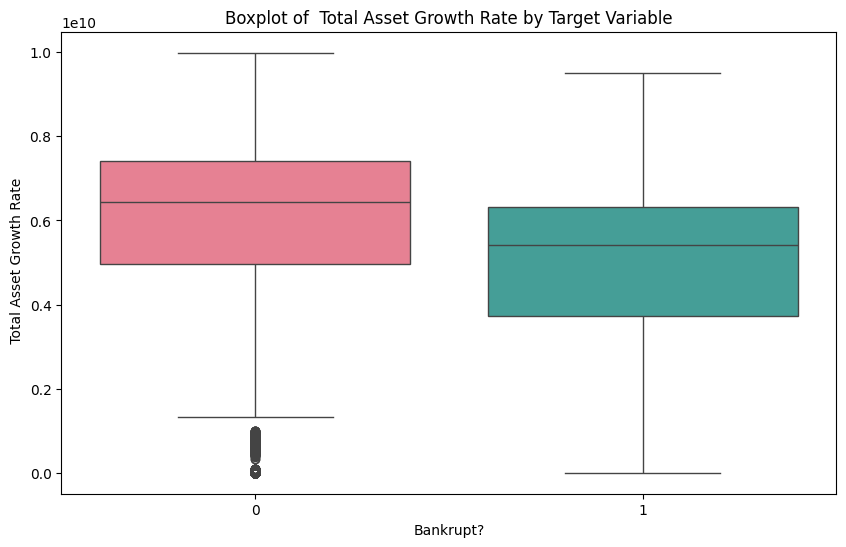

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


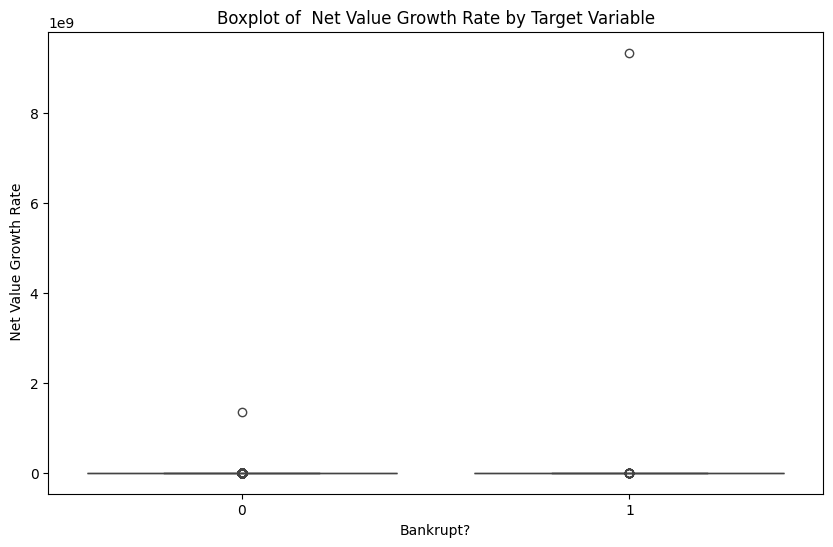

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


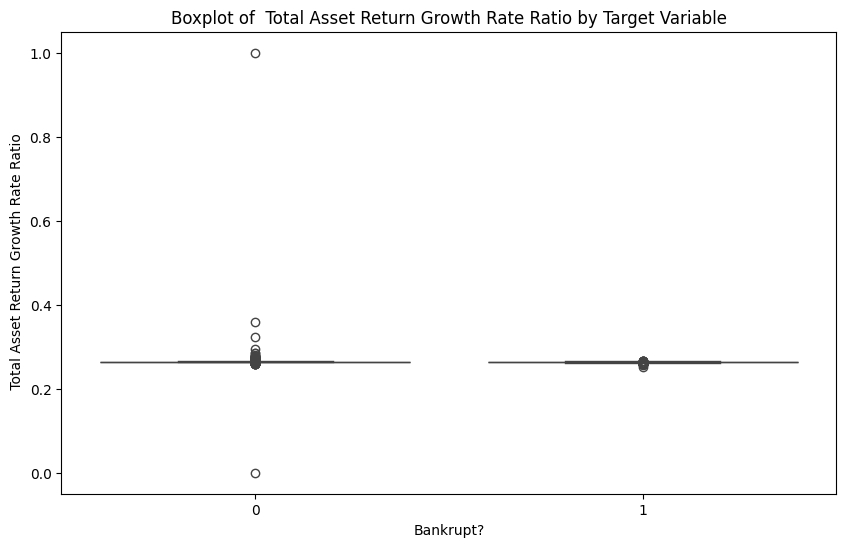

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


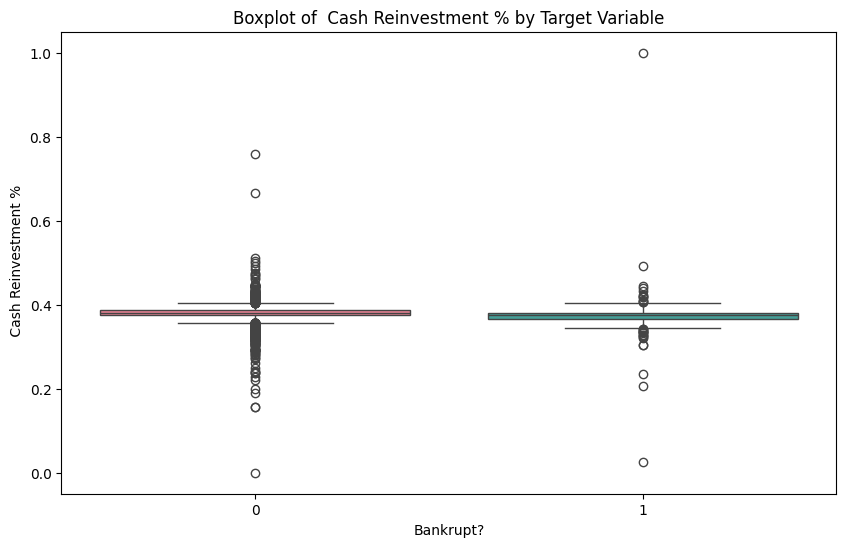

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


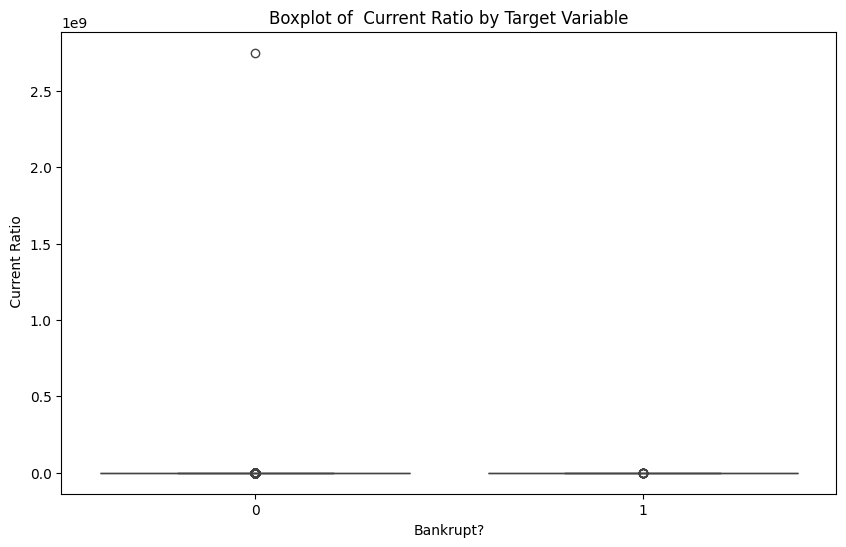

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


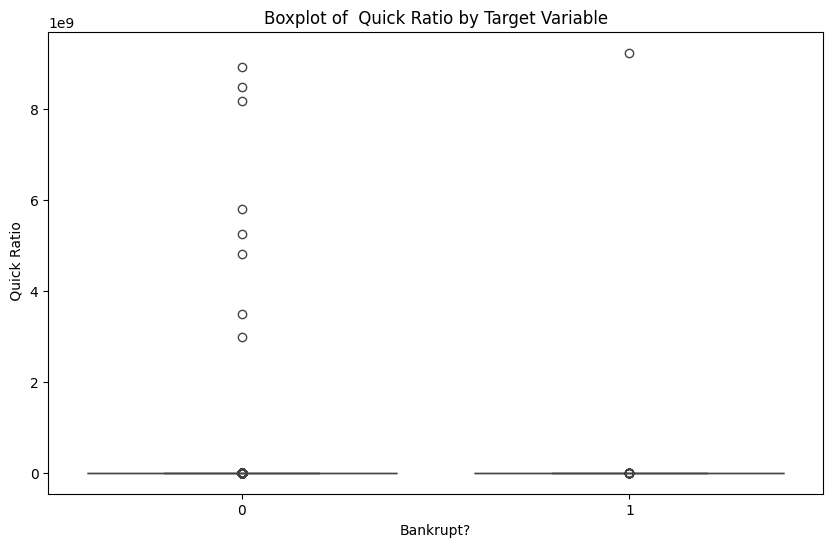

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


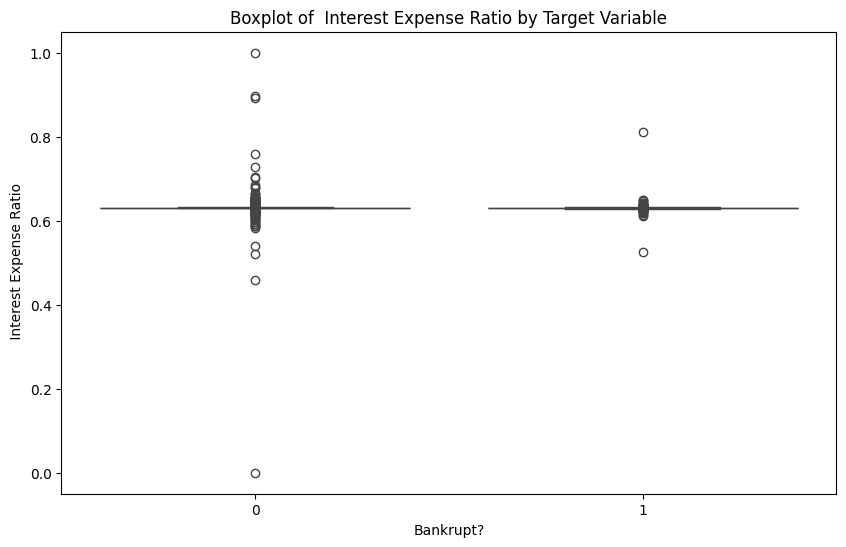

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


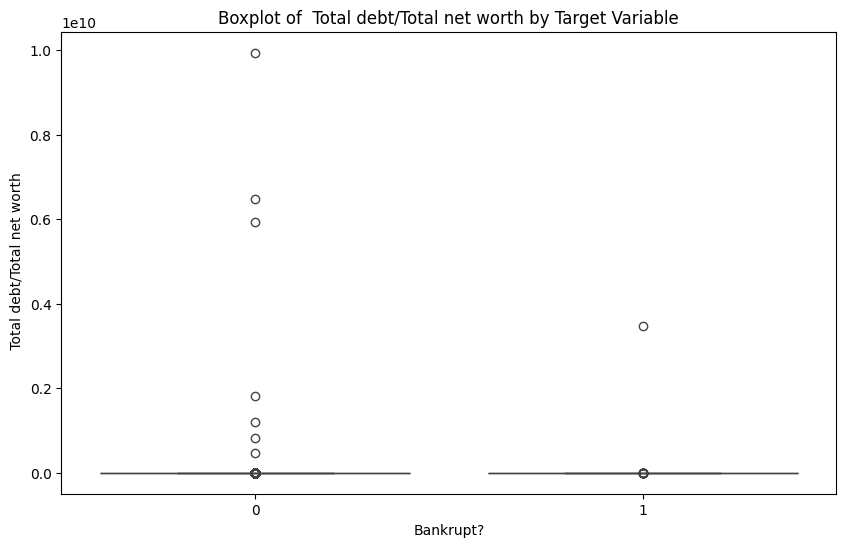

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


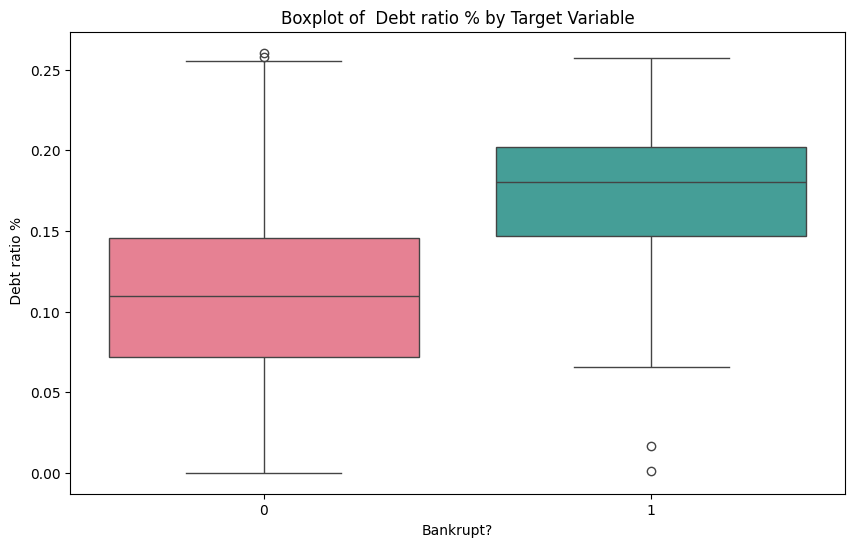

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


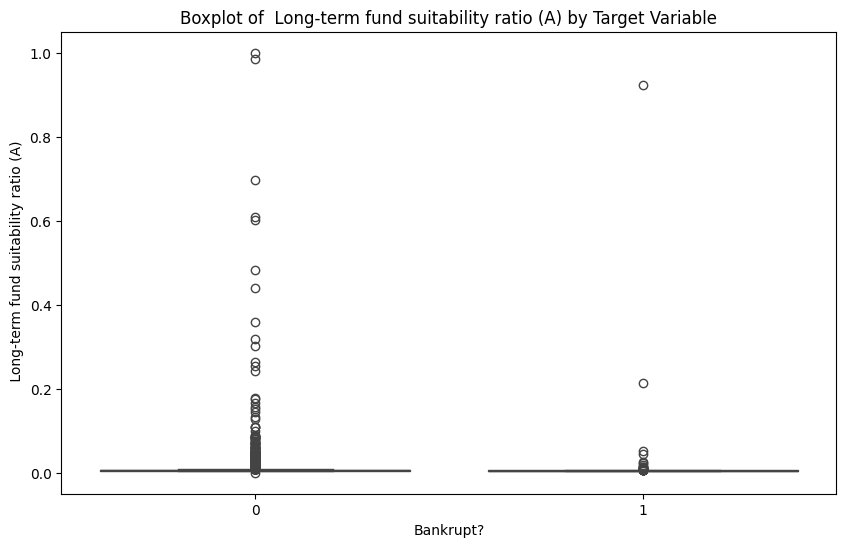

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


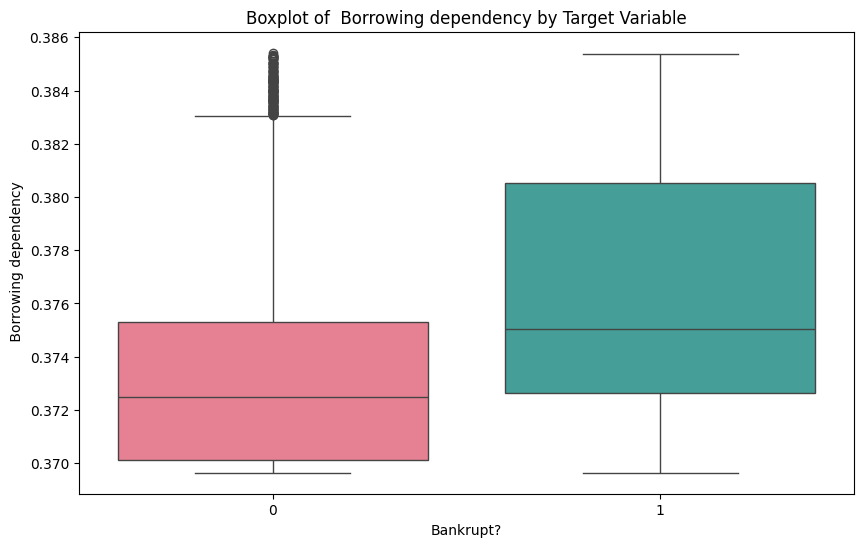

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


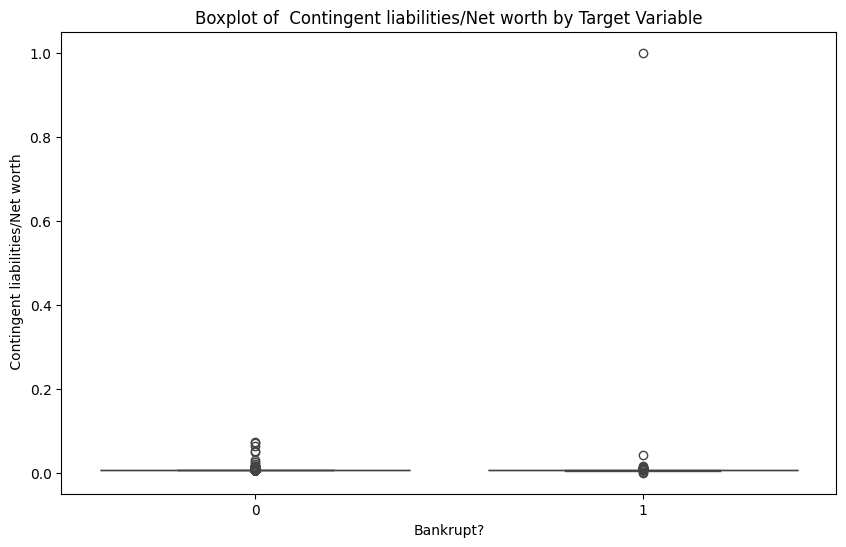

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


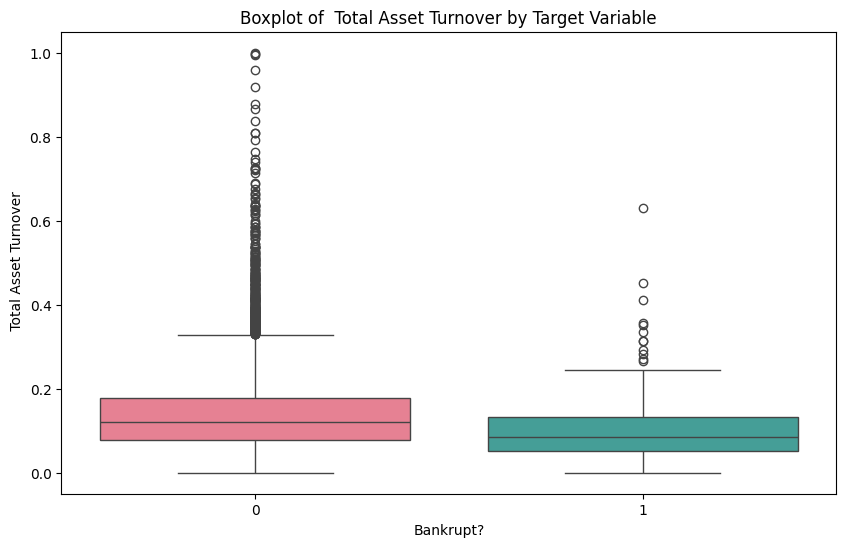

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


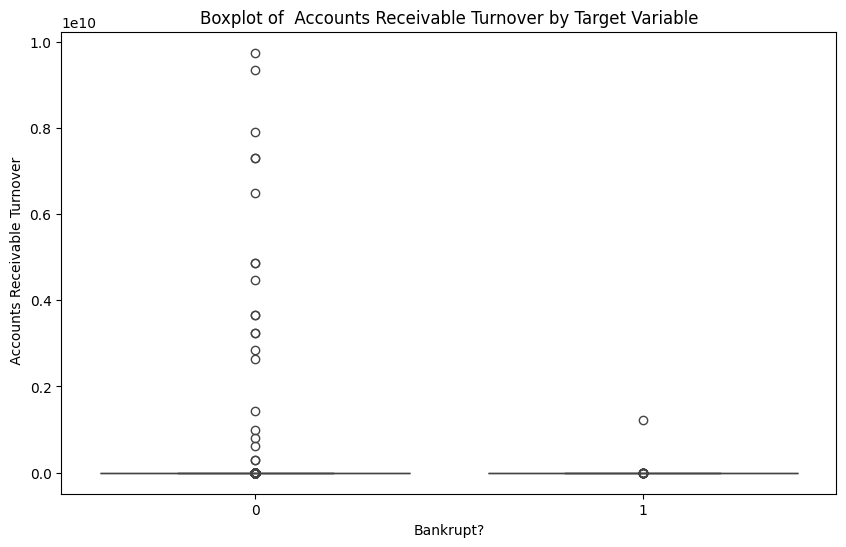

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


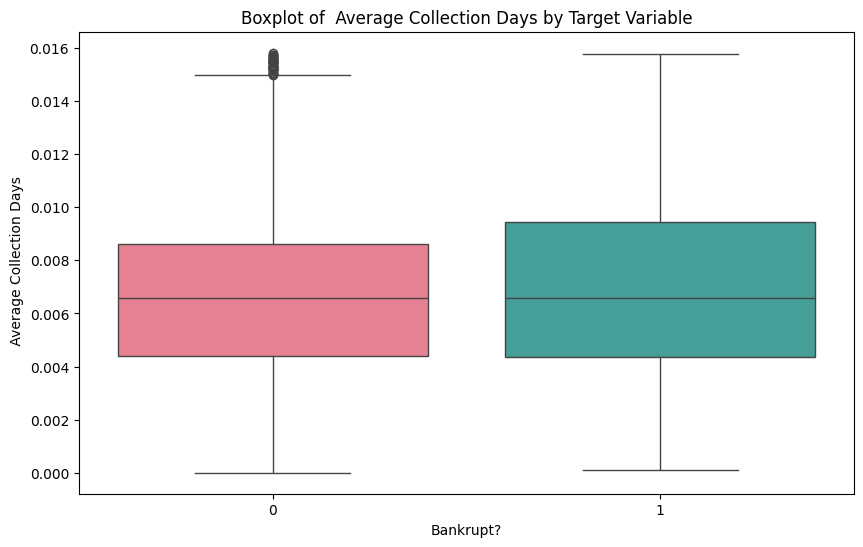

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


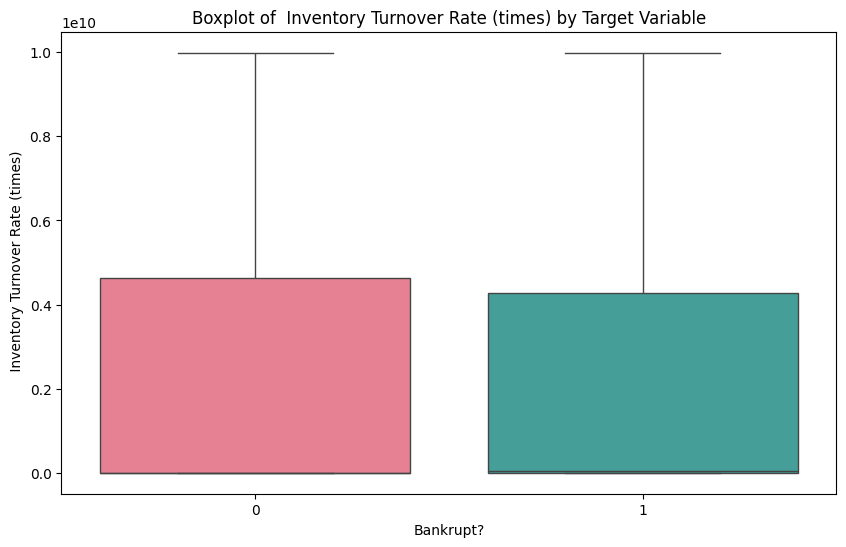

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


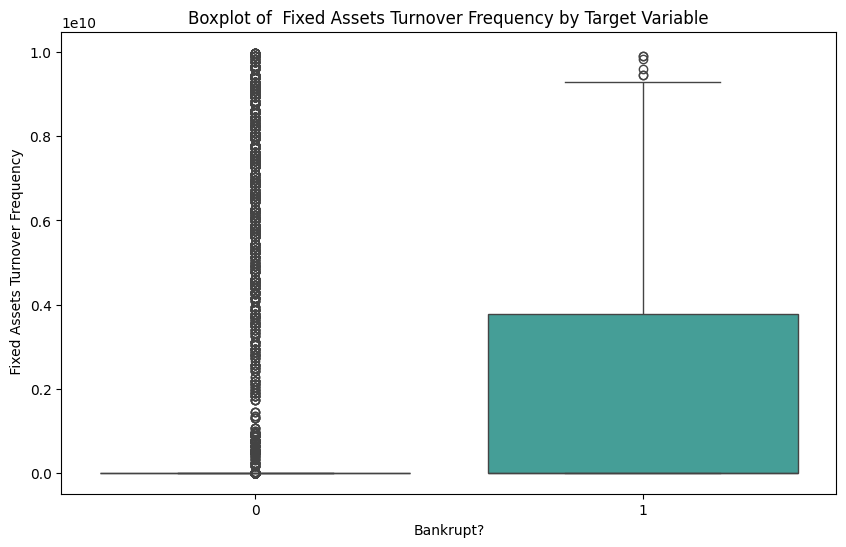

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


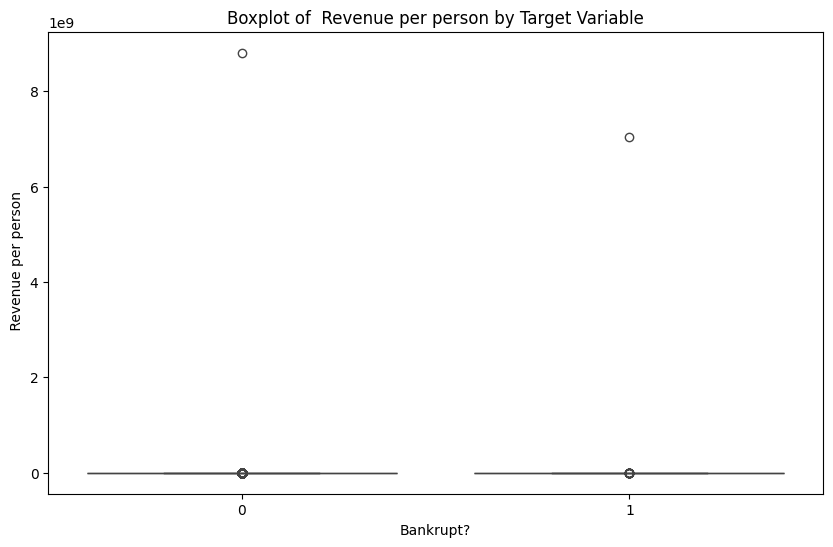

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


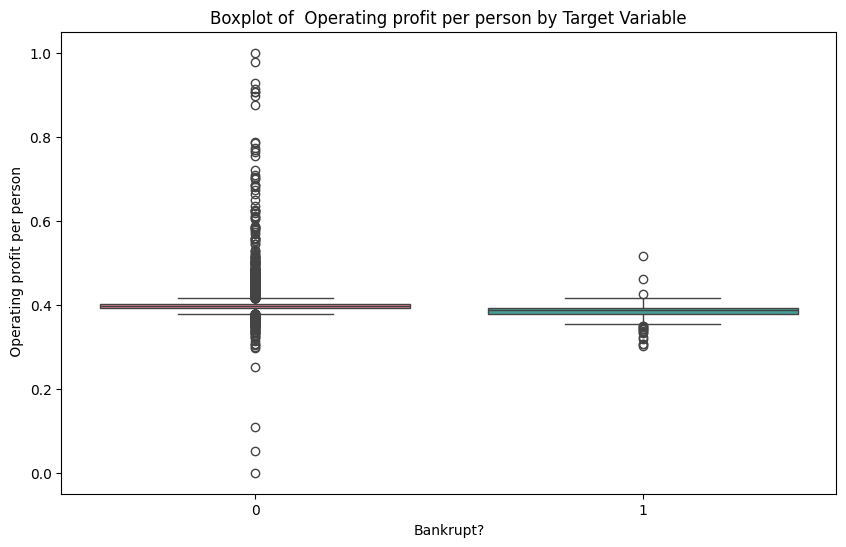

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


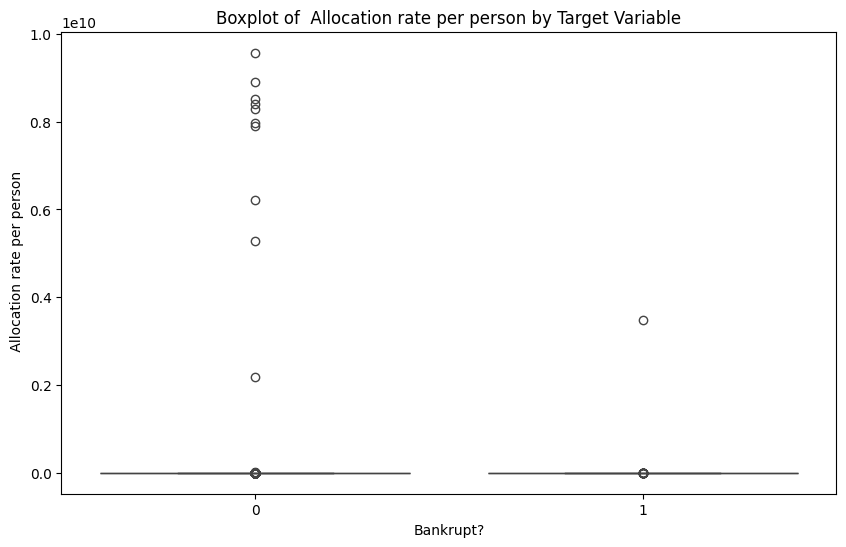

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


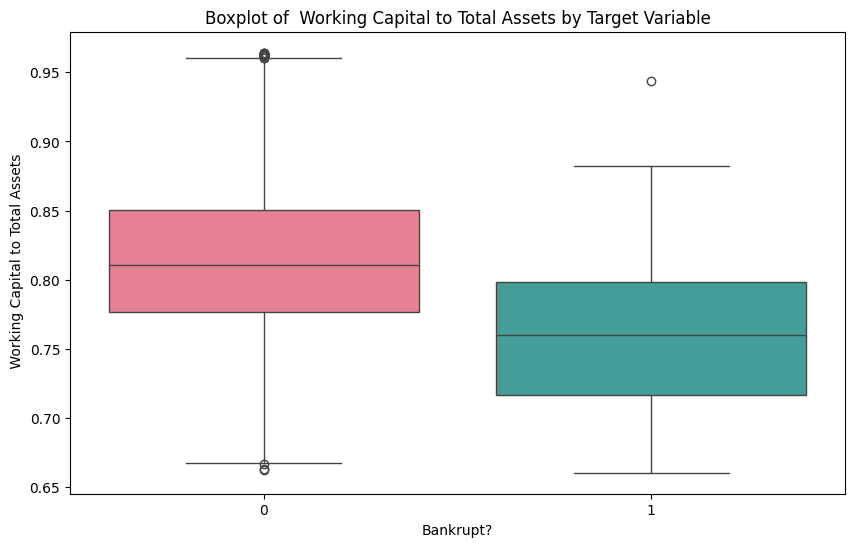

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


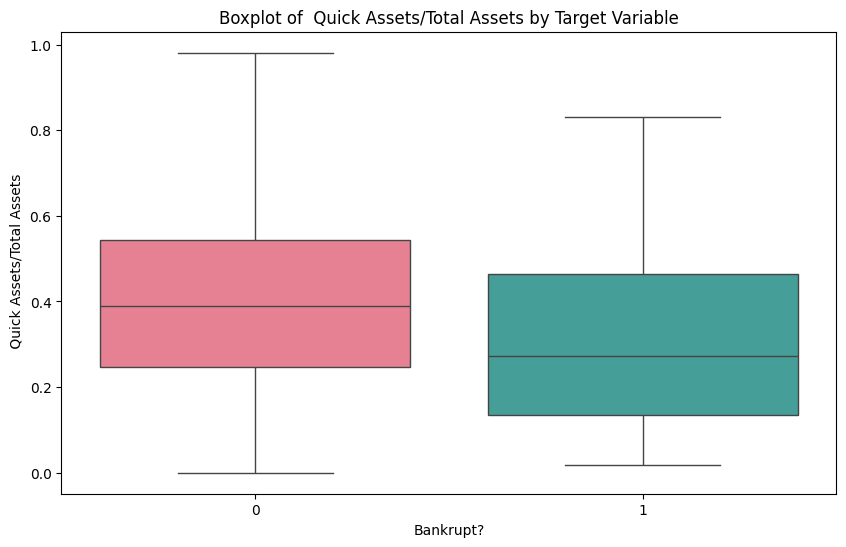

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


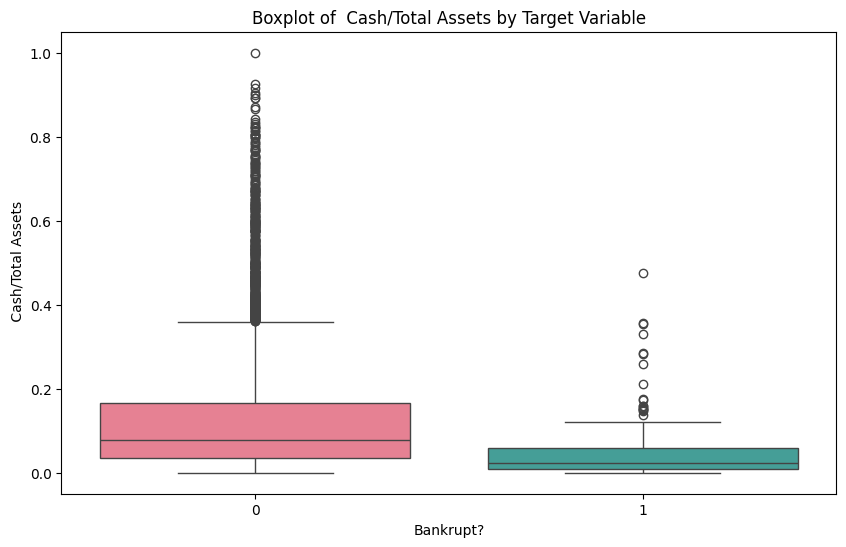

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


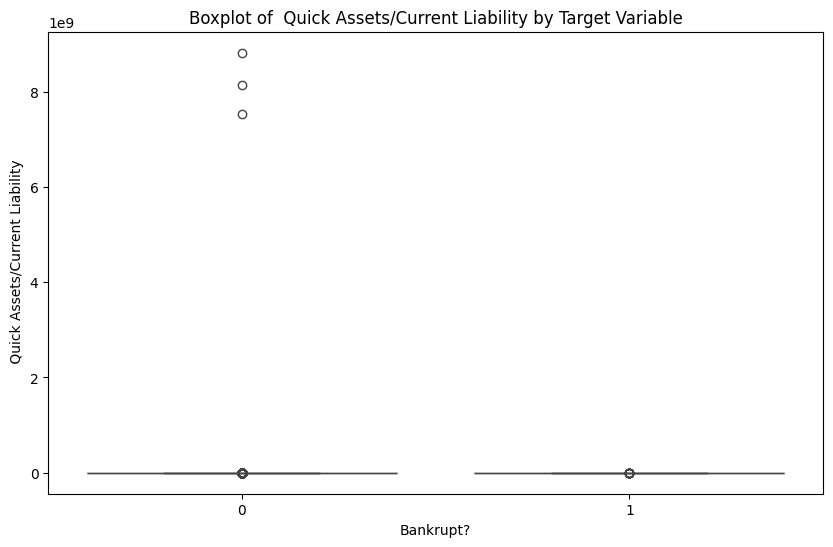

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


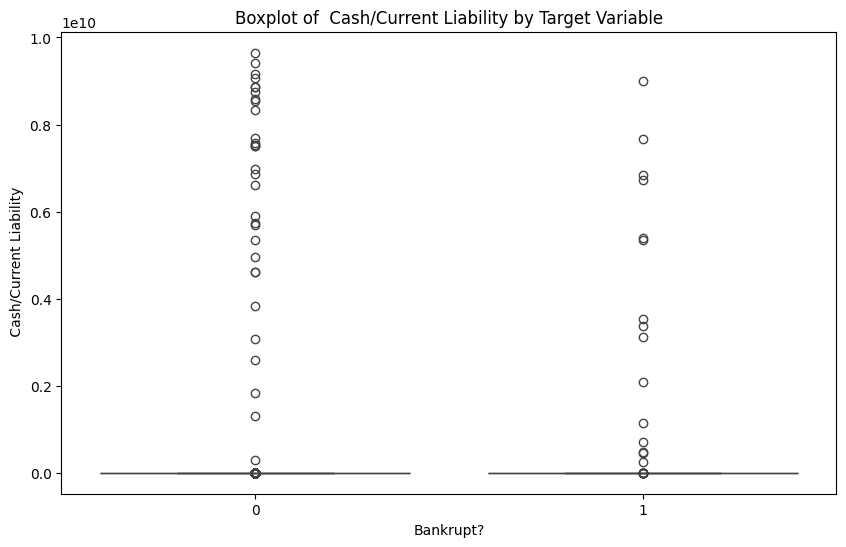

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


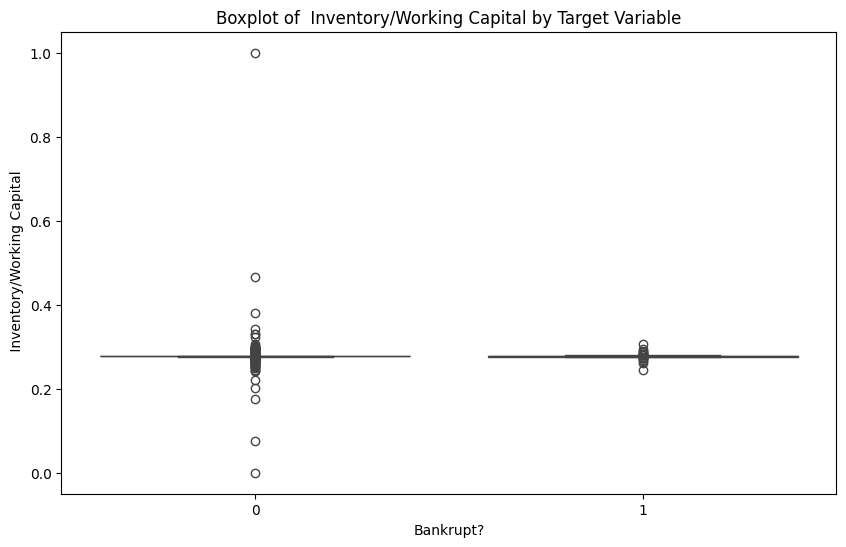

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


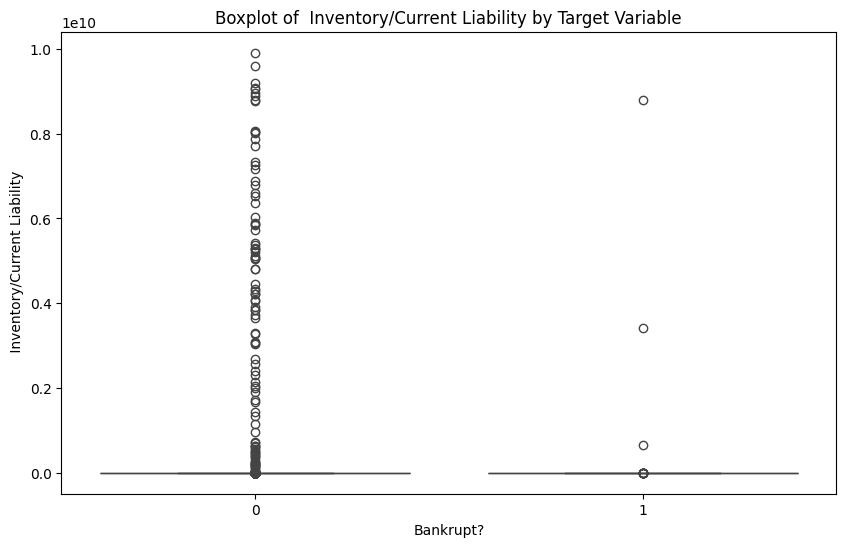

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


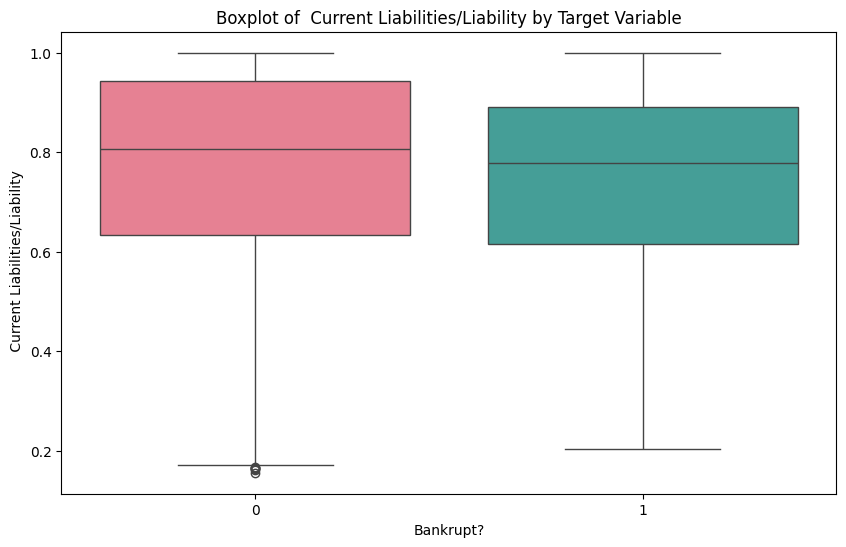

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


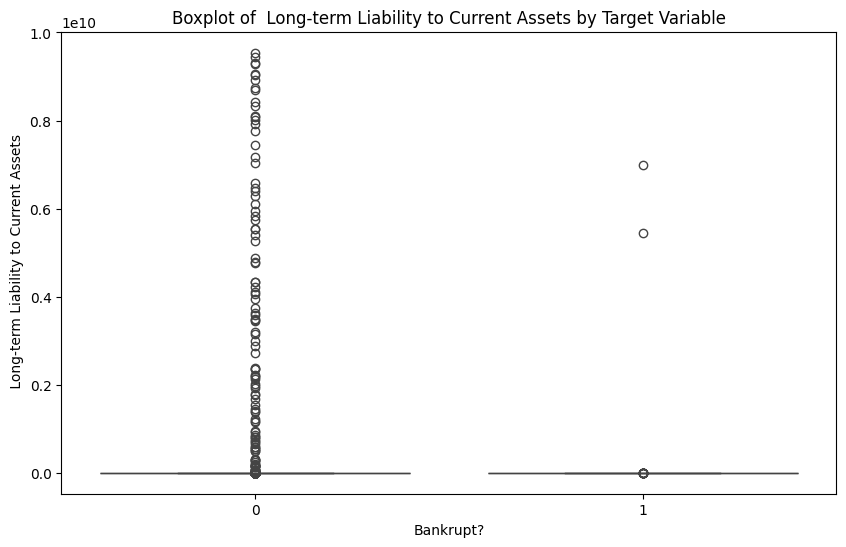

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


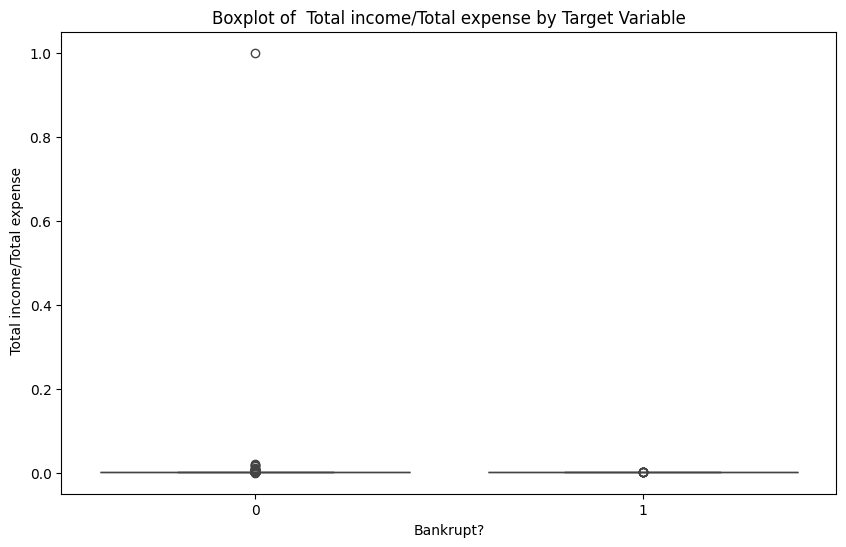

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


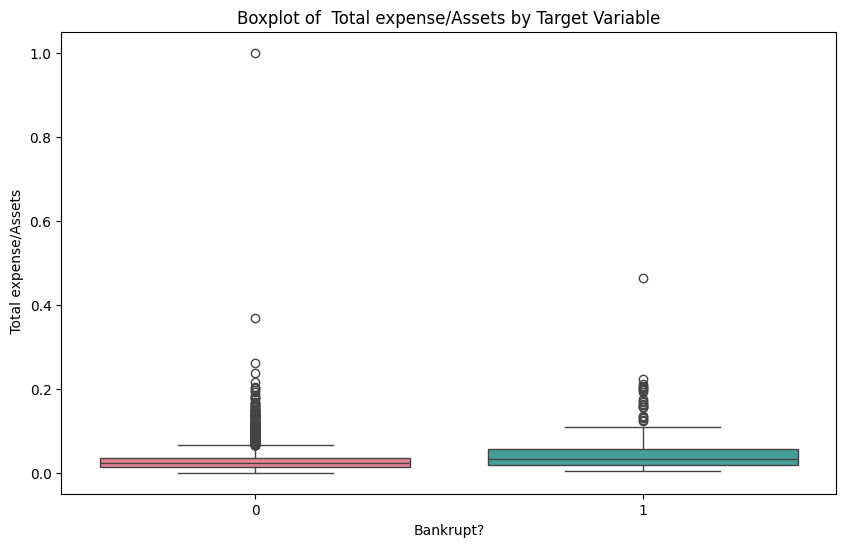

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


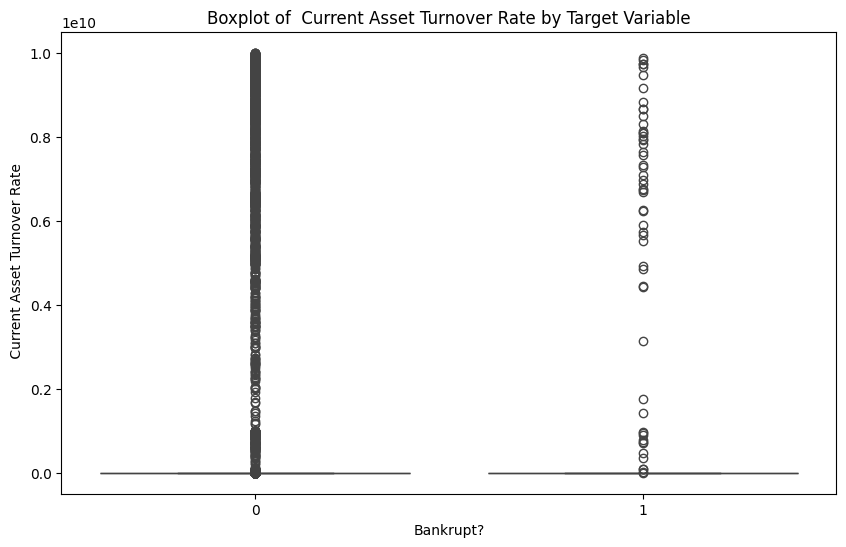

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


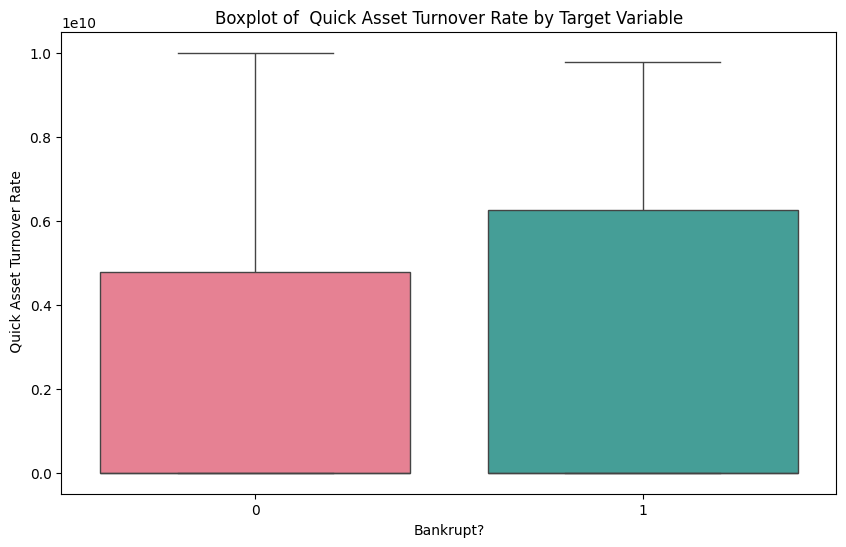

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


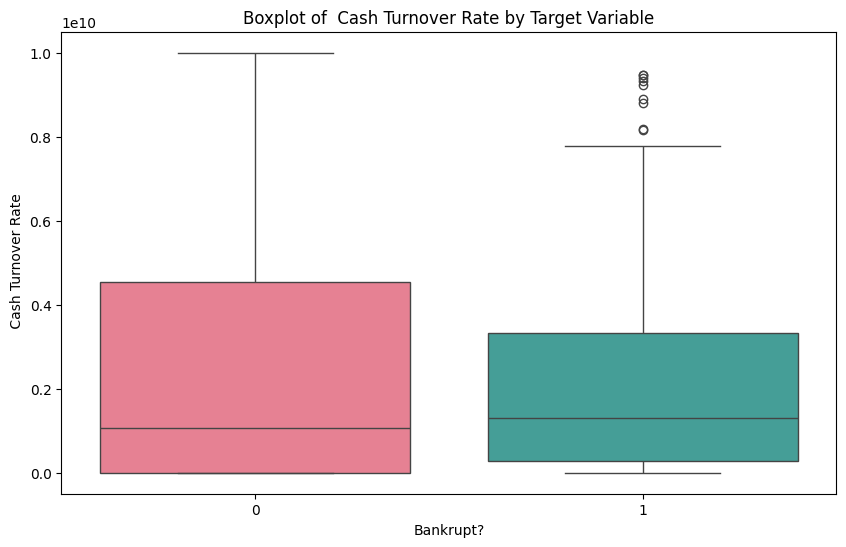

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


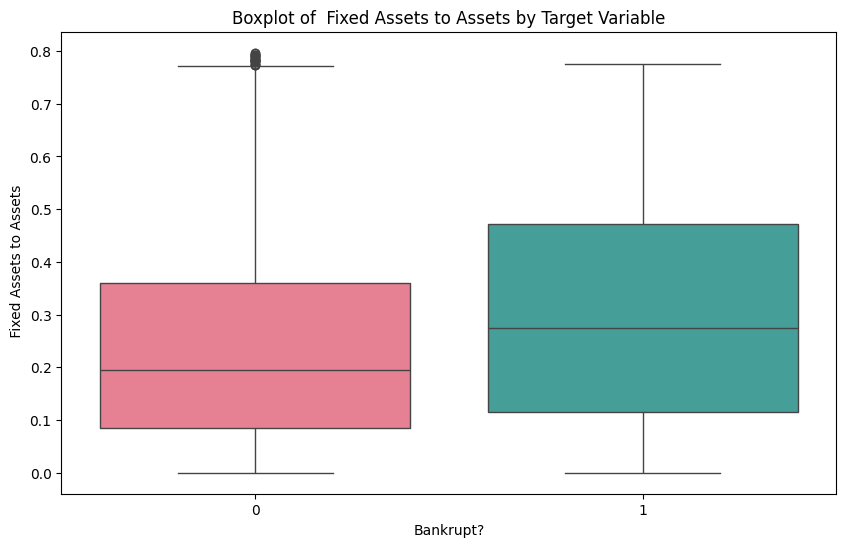

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


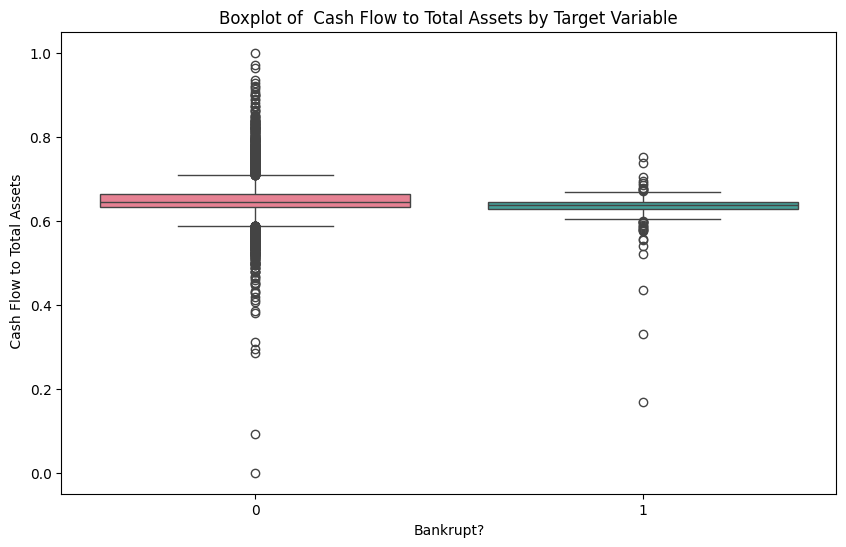

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


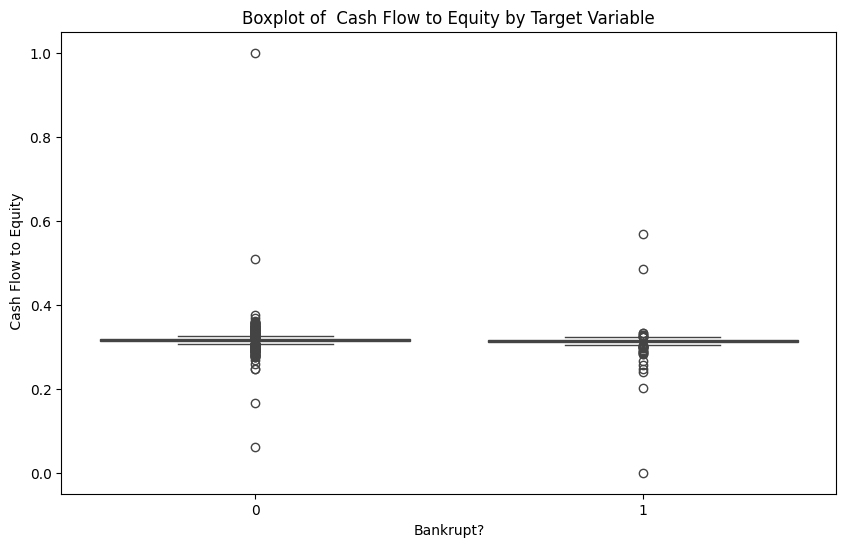

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


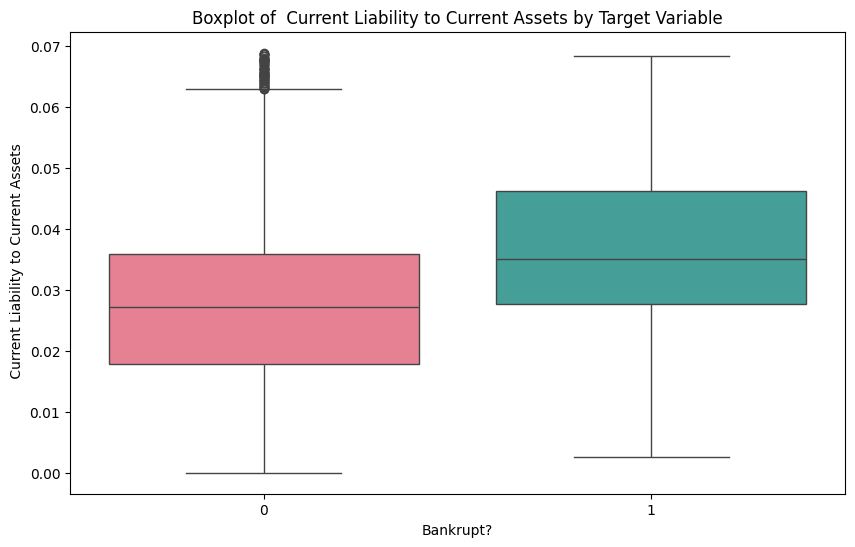

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


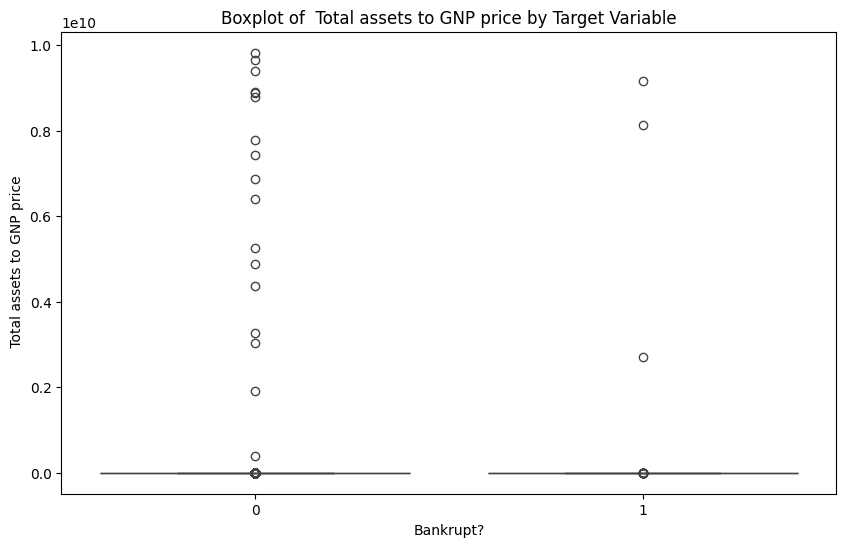

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


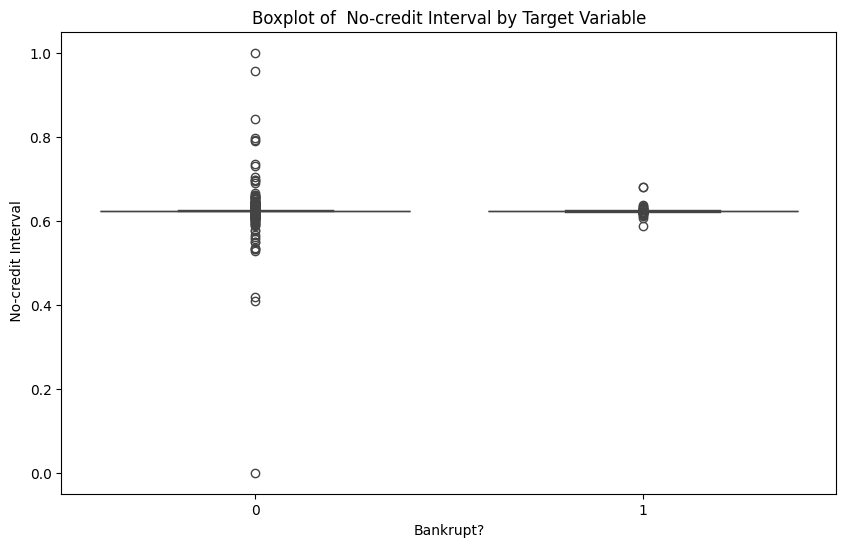

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


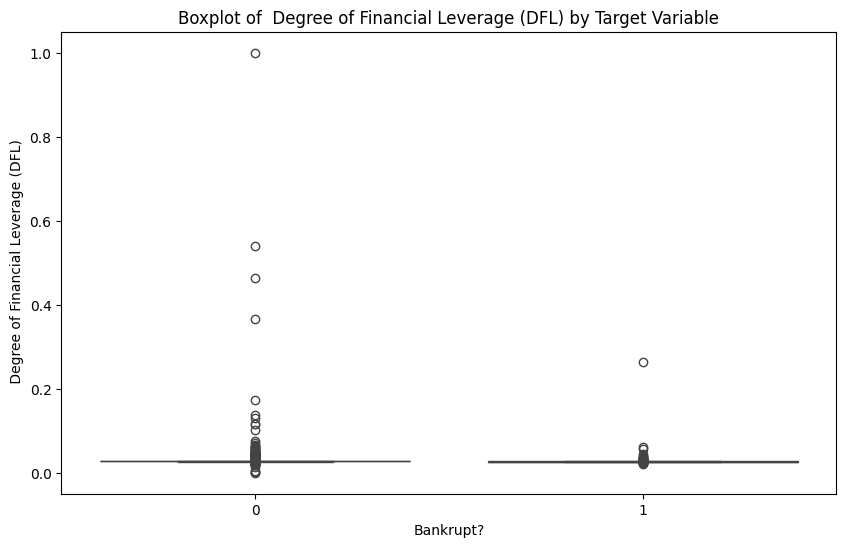

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


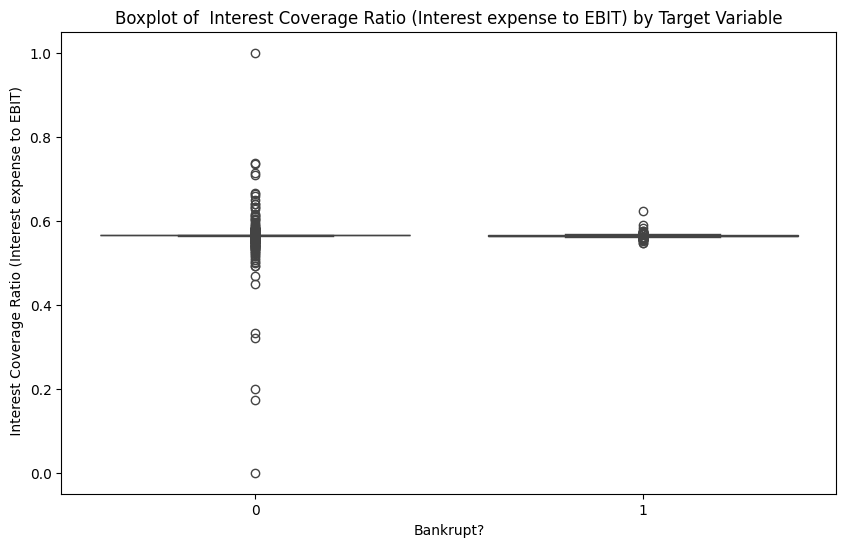

C:\Users\Rishi\AppData\Local\Temp\ipykernel_29300\843053381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=feature, data=dataframe, palette=palette)


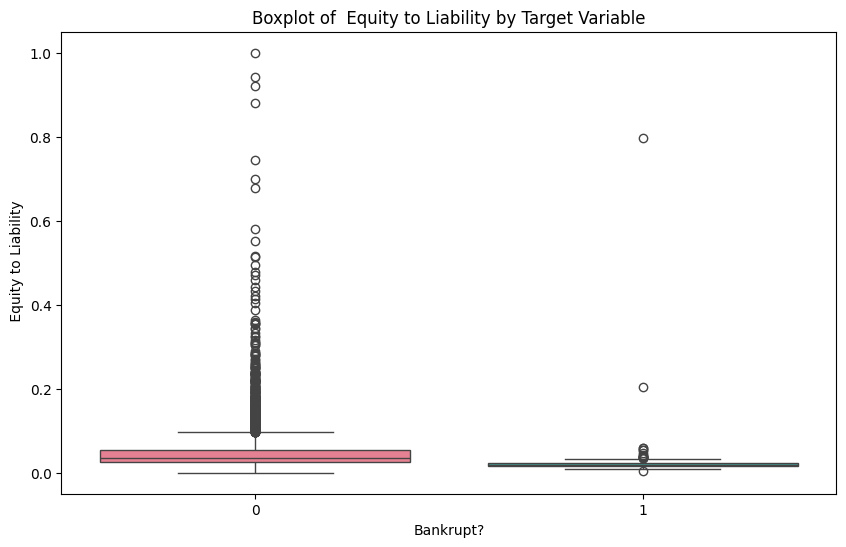

In [22]:
plot_boxplots(df, 'Bankrupt?', numerical_features_reduced)


In [24]:
from scipy.stats import f_oneway

In [27]:
numerical_feature_annova = []

for column in numerical_features_reduced:
    groups = [df[df['Bankrupt?'] == target][column] for target in df['Bankrupt?'].unique()]
    f_stat, p_val = f_oneway(*groups)
    print(f'ANOVA pour {column}: F-statistic = {f_stat}, p-value = {p_val}')

    if p_val < 1e-20:
        numerical_feature_annova = numerical_feature_annova + [column]

ANOVA pour  ROA(C) before interest and depreciation before interest: F-statistic = 497.53512106615676, p-value = 1.9508130644925357e-106
ANOVA pour  Operating Gross Margin: F-statistic = 125.47523988050762, p-value = 7.150363286345524e-29
ANOVA pour  Operating Profit Rate: F-statistic = 0.00036004694265056117, p-value = 0.9848616816517054
ANOVA pour  Non-industry income and expenditure/revenue: F-statistic = 1.8773434587397582, p-value = 0.17068150896329284
ANOVA pour  Operating Expense Rate: F-statistic = 0.2522767330593047, p-value = 0.6154927257558591
ANOVA pour  Research and development expense rate: F-statistic = 4.211860409512637, p-value = 0.04018039109979033
ANOVA pour  Cash flow rate: F-statistic = 35.877043951385716, p-value = 2.208651996516567e-09
ANOVA pour  Interest-bearing debt interest rate: F-statistic = 3.627845289336068, p-value = 0.05686238207238798
ANOVA pour  Tax rate (A): F-statistic = 120.26336316309074, p-value = 9.439315851603276e-28
ANOVA pour  Net Value Per S